### Importing Packages

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


# Suppress warnings
warnings.filterwarnings('ignore')

In [287]:
#increasing column size to read more data present in more columns
pd.set_option('display.max_columns', 150)


### Load Dataset

In [289]:
df = pd.read_csv("loan.csv",low_memory=False)

In [290]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [291]:
# print no of rows and columns 
df.shape

(39717, 111)

### Exploratory Data Analysis

In [293]:
#Printing columns which have more than 0% missing values
null_col_percent = (df.isna().sum()/df.shape[0]) * 100
null_col_percent[ null_col_percent > 0 ]

emp_title                       6.191303
emp_length                      2.706650
desc                           32.585543
title                           0.027696
mths_since_last_delinq         64.662487
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 68, dtype: float64

In [294]:
# get all the columns in list where column null percentage is greater than 30 percent
greater_than_30_null_cols = list(null_col_percent[null_col_percent > 30 ].index)
print("greater than 30 percent colums count", len(greater_than_30_null_cols))
print("Greater than 30 percent columns",greater_than_30_null_cols)

greater than 30 percent colums count 58
Greater than 30 percent columns ['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dp

In [295]:

# Recommended way to drop the above columns as their values will not be helpful for analysis.  
df.drop(greater_than_30_null_cols, axis=1, inplace=True)

In [296]:
#size after dropping 30 percent columns which were empty. 
df.shape

(39717, 53)

In [297]:
# check if any duplicates are there in dataset
df.duplicated().sum()

0

In [298]:
# verify percentage of null values for all columns 
null_col_percent = (df.isna().sum()/len(df.index)) * 100
null_col_percent

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [299]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [300]:
#find out same value in all the columns
df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [301]:
# dropping unique column count value is 1 across the column data
unique_one_col_list = list(df.columns[df.nunique() == 1])
print("unique only one values present column names are ",unique_one_col_list)
df.drop(unique_one_col_list, axis=1, inplace=True)


unique only one values present column names are  ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [302]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,13,0,7274,13.10%,40,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,6,0,8847,26.90%,9,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,11,0,9698,19.40%,20,0.00,0.00,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,17,0,85607,0.70%,26,0.00,0.00,5174.198551,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07,NaN


In [303]:
# drop the columns where having text values and not relenvant for analysis
df.drop(["id","member_id","title","url","sub_grade","emp_title"], axis=1, inplace=True)

In [304]:
df.shape

(39717, 38)

In [305]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [306]:
df.shape

(39717, 38)

In [307]:
# dropping the columns does not seems to be helful.
df.drop(['delinq_2yrs', 
         'earliest_cr_line', 
         'inq_last_6mths',
         'open_acc',
         'pub_rec', 
         'revol_bal',
         'revol_util',
         'total_acc',
         'out_prncp',
         'out_prncp_inv', 
         'total_pymnt',
         'total_pymnt_inv',
         'total_rec_prncp',
         'total_rec_int', 
         'total_rec_late_fee', 
         'recoveries',
         'collection_recovery_fee',
         'last_pymnt_d', 
         'last_pymnt_amnt',
         'last_credit_pull_d'], axis=1, inplace=True)

In [308]:
# verify percentage of null values for all columns 
null_col_percent = (df.isna().sum()/len(df.index)) * 100
null_col_percent

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.754916
dtype: float64

In [309]:
df = df[df["loan_status"] != "Current"]

In [310]:
# verify percentage of null values for all columns 
null_col_percent = (df.isna().sum()/len(df.index)) * 100
null_col_percent

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

In [311]:
df["emp_length"].fillna(0, inplace=True)
df["pub_rec_bankruptcies"].fillna(0, inplace=True)

In [312]:
# verify percentage of null values for all columns 
null_col_percent = (df.isna().sum()/len(df.index)) * 100
null_col_percent

loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [313]:
#Stripping empty space in values in term
df['term'] = df["term"].str.strip()

In [314]:
df["term"].unique()

array(['36 months', '60 months'], dtype=object)

In [315]:
# Convert the term column into an integer from a string
df['term'] = df['term'].apply(lambda x : int(x[:-7]))

In [316]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,2500,2500,2500.0,60,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,2400,2400,2400.0,36,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,10000,10000,10000.0,36,13.49%,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,5000,5000,5000.0,36,7.90%,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0


In [317]:
# Convert int_rate to  float by removing the "%" character
df['int_rate'] = df['int_rate'].apply(lambda x : float(x[:-1]))

In [318]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,5000,5000,5000.0,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0


In [319]:
# Converting the column issue_d from string object to DateTime
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')

In [320]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0.0
5,5000,5000,5000.0,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36,8.07,78.42,A,4 years,MORTGAGE,110000.0,Not Verified,2007-07-01,Fully Paid,home_improvement,802xx,CO,11.33,0.0
39713,8500,8500,875.0,36,10.28,275.38,C,3 years,RENT,18000.0,Not Verified,2007-07-01,Fully Paid,credit_card,274xx,NC,6.40,0.0
39714,5000,5000,1325.0,36,8.07,156.84,A,< 1 year,MORTGAGE,100000.0,Not Verified,2007-07-01,Fully Paid,debt_consolidation,017xx,MA,2.30,0.0
39715,5000,5000,650.0,36,7.43,155.38,A,< 1 year,MORTGAGE,200000.0,Not Verified,2007-07-01,Fully Paid,other,208xx,MD,3.72,0.0


### Common Functions

In [322]:
def con_emp_len_to_num(emp_len):
    
    if (emp_len == "10+ years"):
        return 10
    elif (emp_len == "< 1 year"):
        return 0
    elif (emp_len == "3 years"):
        return 3
    elif (emp_len == "8 years"):
        return 8
    elif (emp_len == "9 years"):
        return 9
    elif (emp_len == "4 years"):
        return 4
    elif (emp_len == "5 years"):
        return 5
    elif (emp_len == "1 year"):
        return 1
    elif (emp_len == "6 years"):
        return 6
    elif (emp_len == "2 years"):
        return 2
    elif (emp_len == "7 years"):
        return 7  
    else:
        return 0

def debt_to_inc_ration_to_bracket(dti):
    if((dti>=0) and (dti<=5)):
        return "0-5"
    elif((dti>=5) and (dti<=10)):
        return "5-10"
    elif((dti>=10) and (dti<=15)):
        return "10-15"
    elif((dti>=15) and (dti<=20)):
        return "15-20"
    elif((dti>=20) and (dti<=25)):
        return "20-25"
    elif((dti>=25) and (dti<=30)):
        return "25-30"    
         
    
# Bucketting Months to quarters
def bucket_issue_month(column):
    if column <= 3:
        return 'Q1' 
    elif (column >= 4) and (column <= 6):
        return 'Q2'      
    elif (column >= 7) and (column <=9):
        return 'Q3'  
    else:
        return 'Q4'

# Bucketting Loan Amount
def loan_amnt_groups(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'      
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'  
    else:
        return '15K - above' # 75% quartile

# Bucketting Funded Amount
def funded_amnt_inv_group(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'      
    elif (column >10000) and (column <= 15000):
        return '10K - 15K' 
    else:
        return '15K - above' # 75% quartile

def int_rate_groups(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column >9) and (column <= 11):
        return 'Low'    
    elif (column >11) and (column <= 13):
        return 'Moderate'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartile

def installment_groups(column):
    if column <= 150:
        return '0-150'
    elif (column >150) and (column <= 300):
        return '150-300' 
    elif (column >300) and (column <= 450):
        return '300-450'
    else :              
        return '450-Above'

In [323]:

df["emp_length"] = df["emp_length"].apply(con_emp_len_to_num)

df["emp_length"] = df["emp_length"].astype(int)

In [324]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0.0
5,5000,5000,5000.0,36,7.90,156.46,A,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0.0


### Derived Columns 

In [326]:
df['issue_y'] = df['issue_d'].dt.year
df['issue_m'] = df['issue_d'].dt.month

income_brackets = [
    (0, 20000, "0-20K"),
    (20001,40000, "20-40K"),
    (40001, 60000, "40-60K"),
    (60001, 80000, "60-80K"),
    (80001, 100000, "80-1Lacks"),
    (100001, 6000000, "Above 1Lacks")]


# Function to assign income bracket
def categorize_income_with_loop(income):
    for bracket in income_brackets:
        if bracket[0] <= income <= bracket[1]:
            return bracket[2]
    return 'Unknown'  # For any income outside the defined ranges

# Create the new column 'income_bracket'
df['income_bracket'] = df['annual_inc'].apply(categorize_income_with_loop)

df['issue_q'] = df.apply(lambda x : bucket_issue_month(x['issue_m']), axis = 1)

df['loan_amnt_bracket'] = df.apply(lambda x : loan_amnt_groups(x['loan_amnt']), axis = 1)

    
df['funded_amnt_inv_bracket'] = df.apply(lambda x : funded_amnt_inv_group(x['funded_amnt_inv']), axis = 1)

df['int_rate_bracket'] = df.apply(lambda x : int_rate_groups(x.int_rate), axis = 1)

df['installment_bracket'] = df.apply(lambda x : installment_groups(x.installment), axis = 1)

In [327]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_y,issue_m,income_bracket,issue_q,loan_amnt_bracket,funded_amnt_inv_bracket,int_rate_bracket,installment_bracket
0,5000,5000,4975.0,36,10.65,162.87,B,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0.0,2011,12,20-40K,Q4,0 - 5K,0 - 5K,Low,150-300
1,2500,2500,2500.0,60,15.27,59.83,C,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0.0,2011,12,20-40K,Q4,0 - 5K,0 - 5K,Very High,0-150
2,2400,2400,2400.0,36,15.96,84.33,C,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0.0,2011,12,0-20K,Q4,0 - 5K,0 - 5K,Very High,0-150
3,10000,10000,10000.0,36,13.49,339.31,C,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0.0,2011,12,40-60K,Q4,5K - 10K,5K - 10K,High,300-450
5,5000,5000,5000.0,36,7.90,156.46,A,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0.0,2011,12,20-40K,Q4,0 - 5K,0 - 5K,Very Low,150-300


In [328]:
num_col = []
for col in df.columns:
    if df[col].dtype!= "object":
       num_col.append(col)


In [329]:
num_col.remove("issue_m")
num_col.remove("issue_y")
num_col.remove("pub_rec_bankruptcies")
num_col.remove("term")

### Outlier analysis

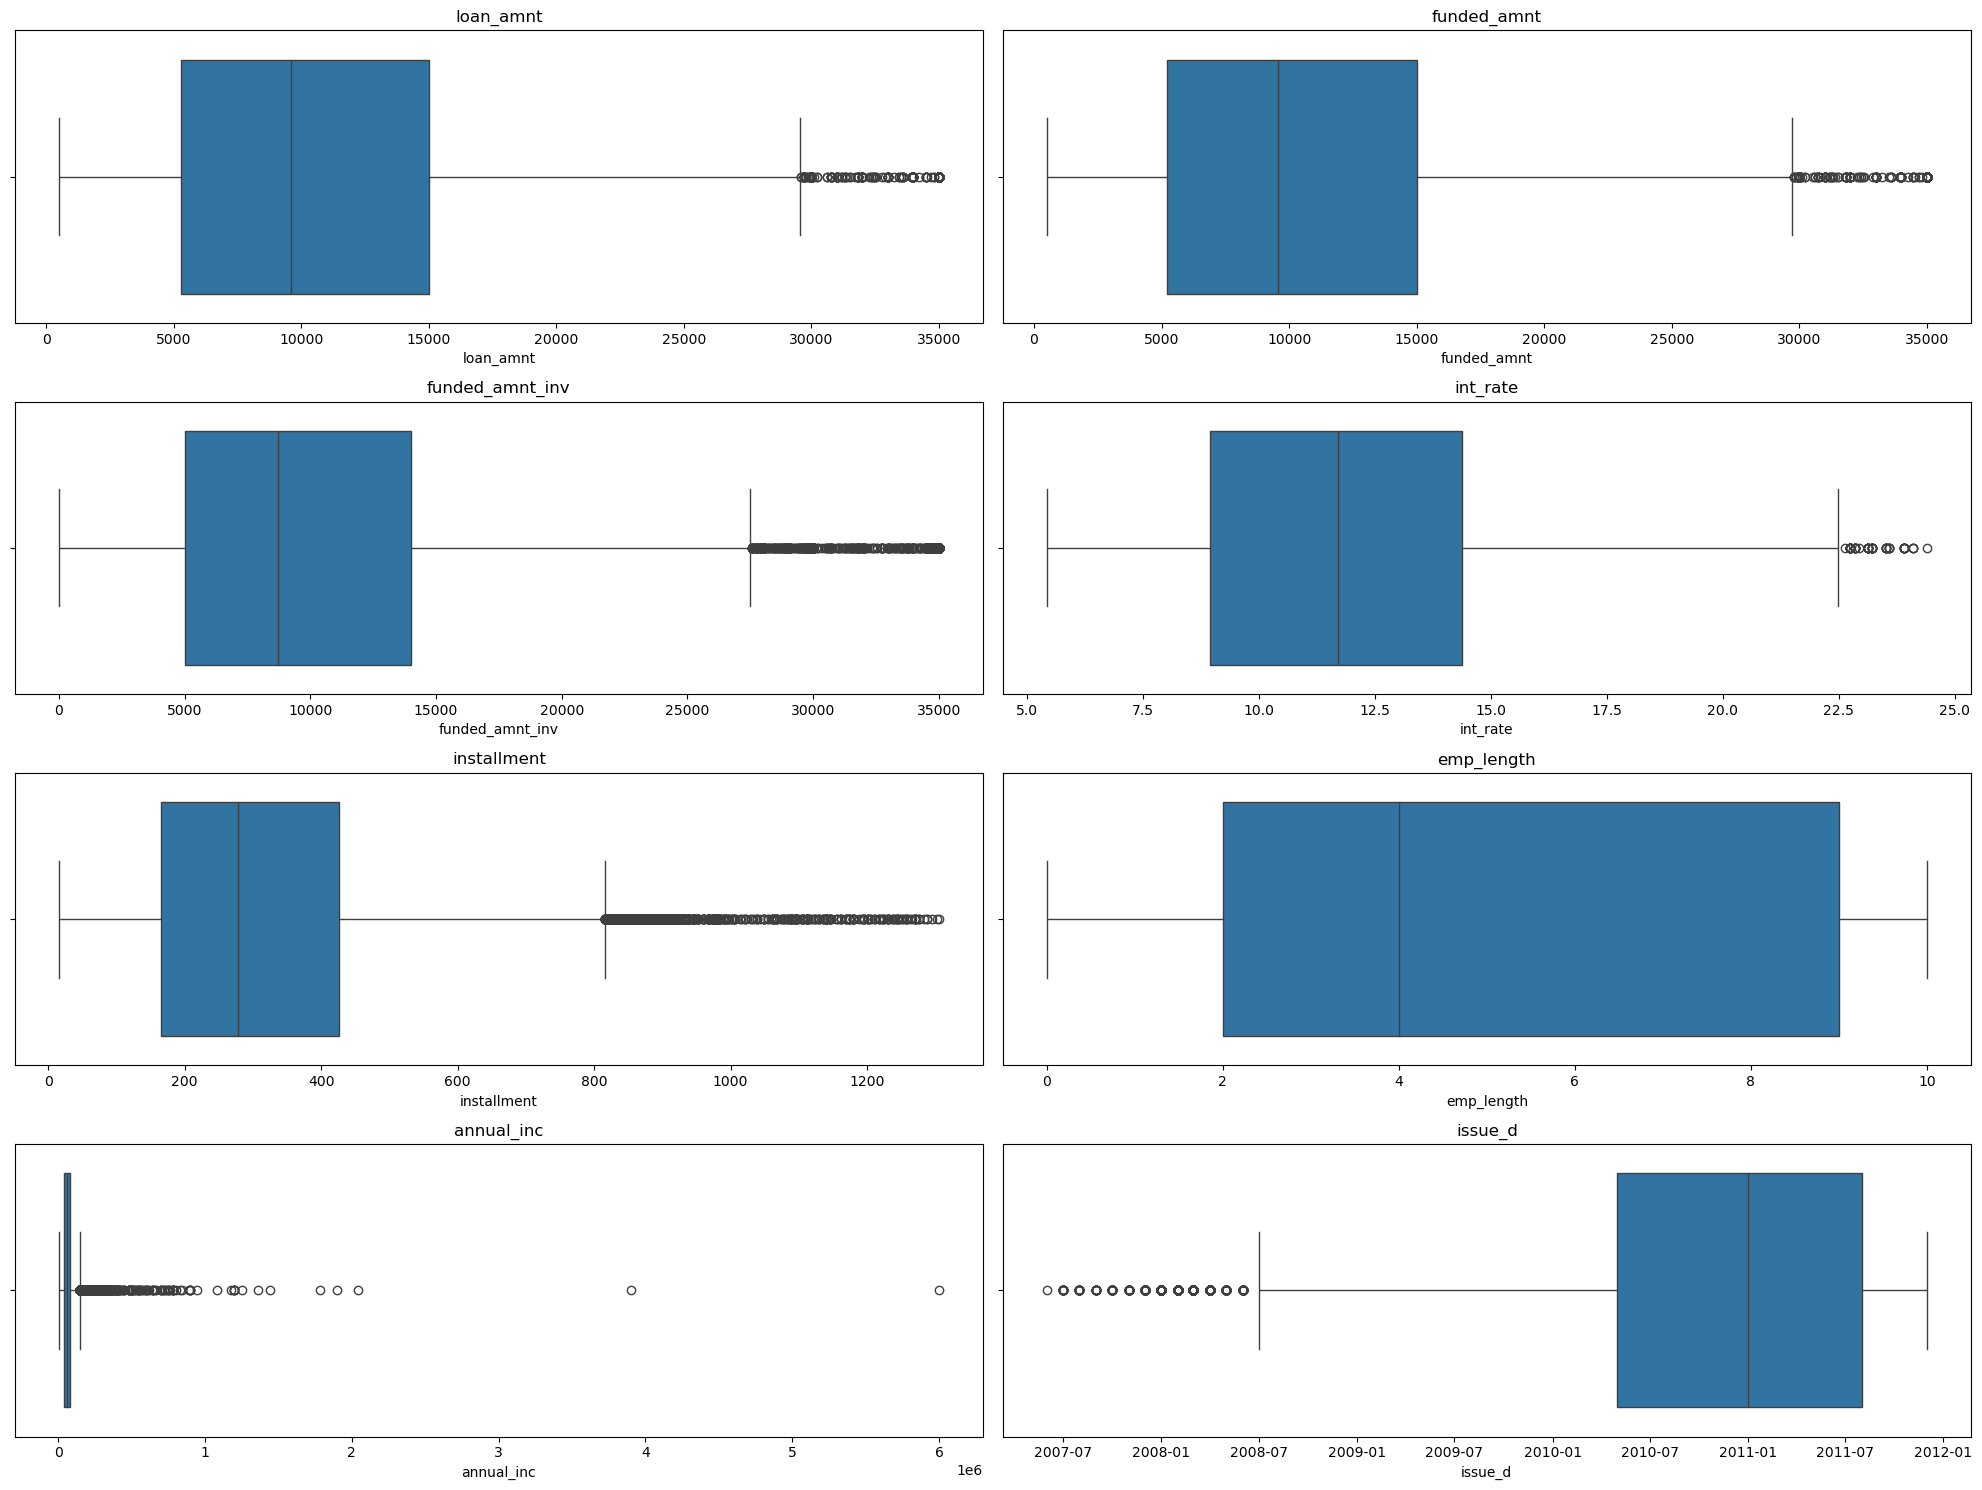

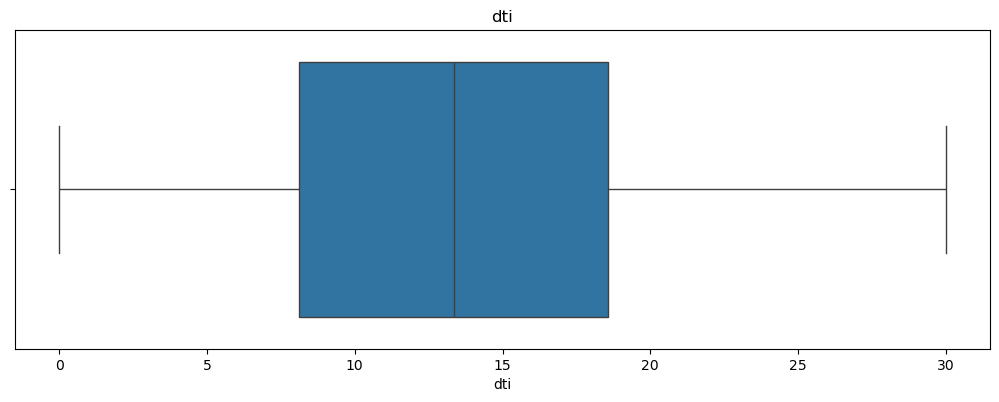

In [331]:
def check_outlier():
        
    # Assuming num_col is a list of column names and df is your dataframe
    i = 1  # Number of rows for subplots
    j = 1  # Current subplot number
    fig = plt.figure(figsize=(20, 15))  # Create a figure with appropriate size
    
    for col in num_col:
        try:
            plt.subplot(4, 2, j)  # Create subplots in a grid of 4 rows, 2 columns
            sns.boxplot(x=df[col])
            plt.title(col)  # Add title to each subplot
            j = j + 1
            
            # When j exceeds the available subplot positions (8), show the plot and reset
            if j > 8:
                plt.tight_layout()
                plt.show()
                fig = plt.figure(figsize=(20, 15))  # Create a new figure for the next set
                j = 1  # Reset subplot index
        except:
            print("Error for column", col)
    
    # Show the last set of plots
    if j != 1:
        plt.tight_layout()
        plt.show()

check_outlier()

### Removing Outlier

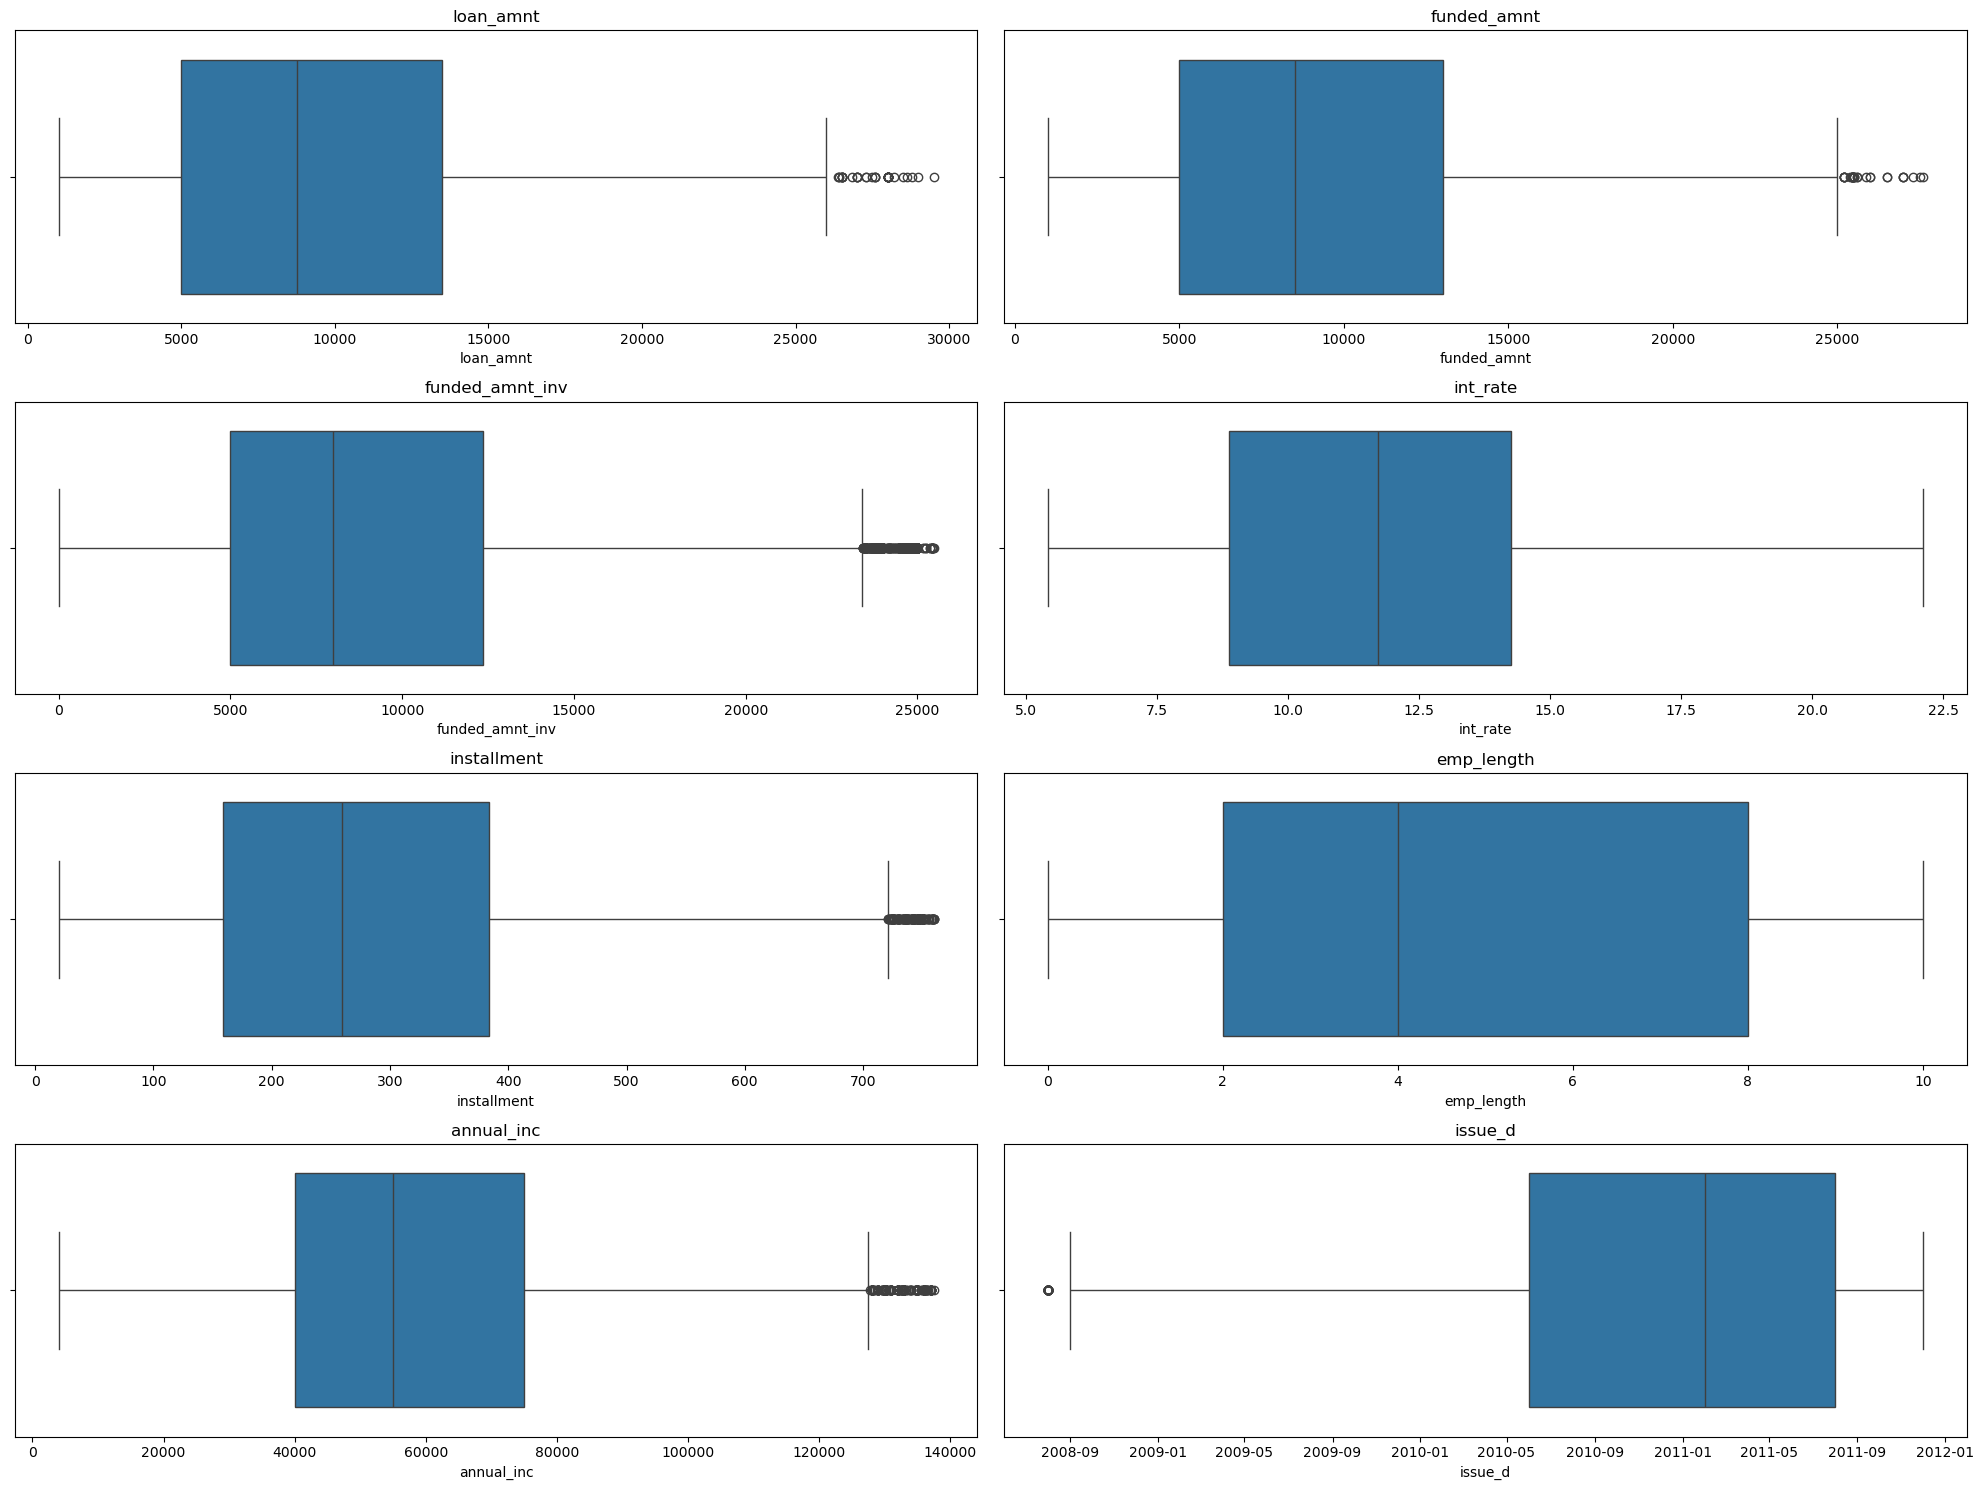

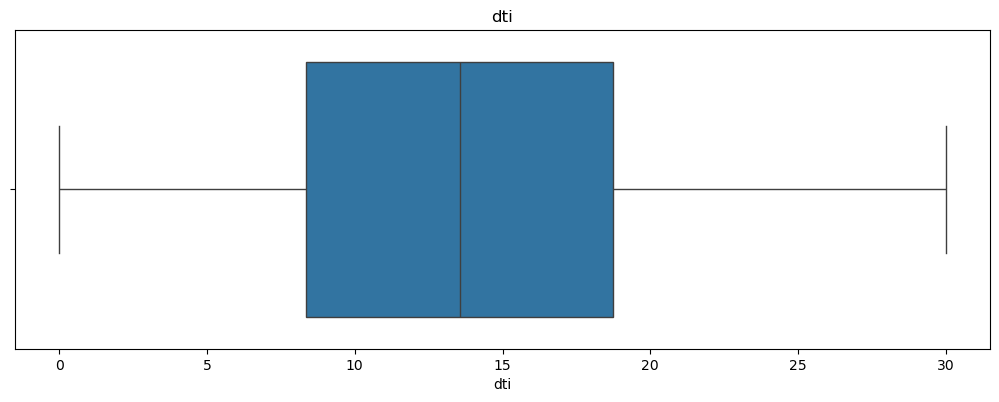

In [333]:
for col in num_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    df = df[(df[col] >= low_whisker) & (df[col] <= upper_whisker)]


check_outlier()

In [334]:
df.shape

(33463, 26)

### Univariate Analysis

In [336]:
palette = sns.color_palette("coolwarm", n_colors=15)  # Choose a color palette

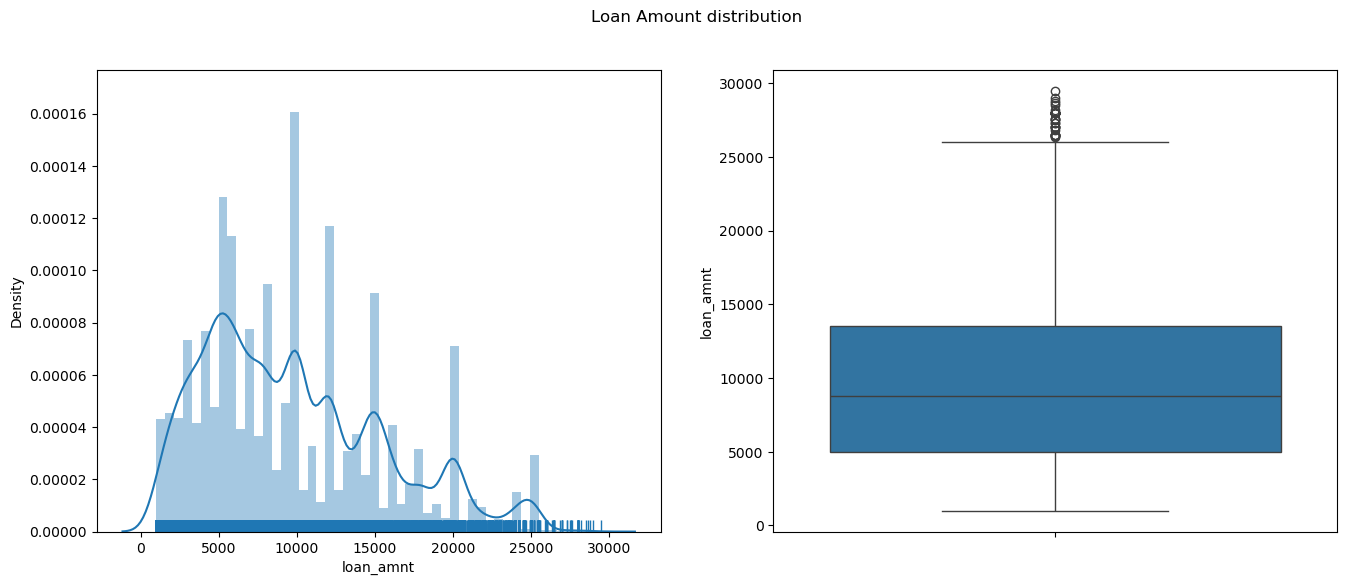

In [337]:
plt.figure(figsize=(16,6))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=df.loan_amnt, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=df.loan_amnt)
#Single title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()

The range of loan amount is 500 to 35000. Most of the loan_amount is in the range of 5K to 14K

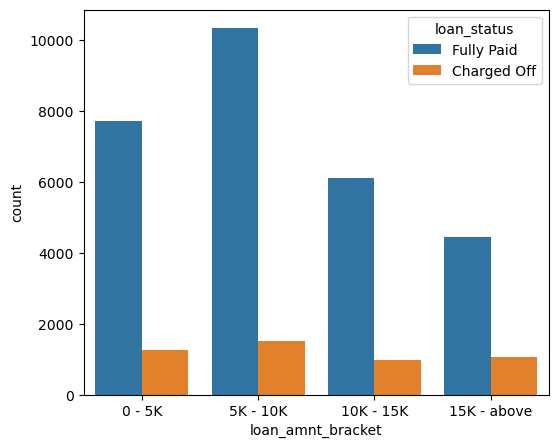

In [339]:
plt.figure(figsize=(6,5))
l = sns.countplot(x = 'loan_amnt_bracket', data = df, hue = "loan_status")
# l.set_title("loan amount wise defaulters Applicants")
plt.show()

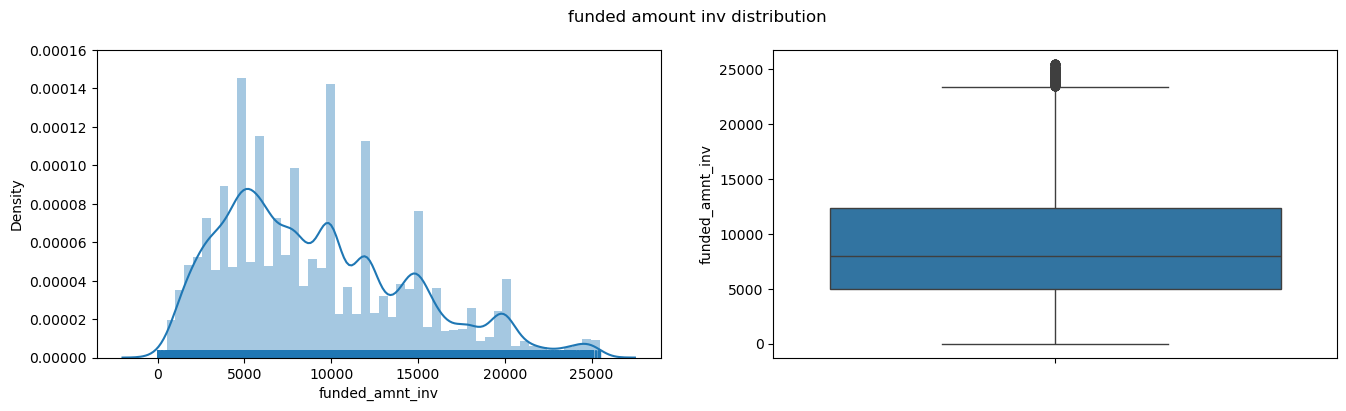

In [340]:
plt.figure(figsize=(16,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=df.funded_amnt_inv, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=df.funded_amnt_inv)
#Single title for both subplots.
plt.suptitle('funded amount inv distribution')
plt.show()

The range of funded amount inv  is 0 to 35000. Most of the funded amount inv is in the range of 5K to 13K

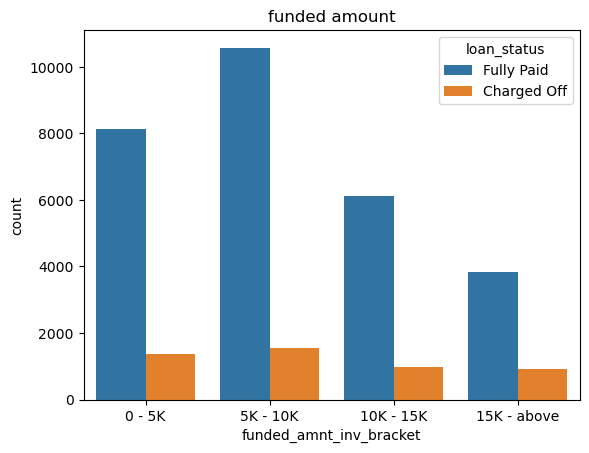

In [342]:
l = sns.countplot(x = 'funded_amnt_inv_bracket', data = df, hue = "loan_status")
l.set_title("funded amount")
plt.show()

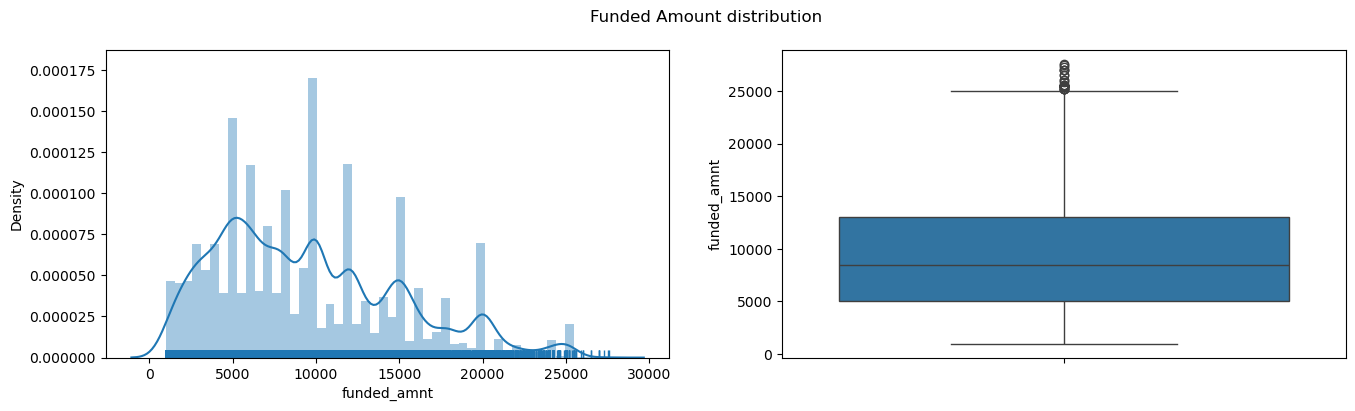

In [343]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(a=df.funded_amnt, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=df.funded_amnt)
plt.suptitle('Funded Amount distribution')
plt.show()

The range of funded amount is 500 to 35000. Most of funded amount  is in the range of 5K to 14K

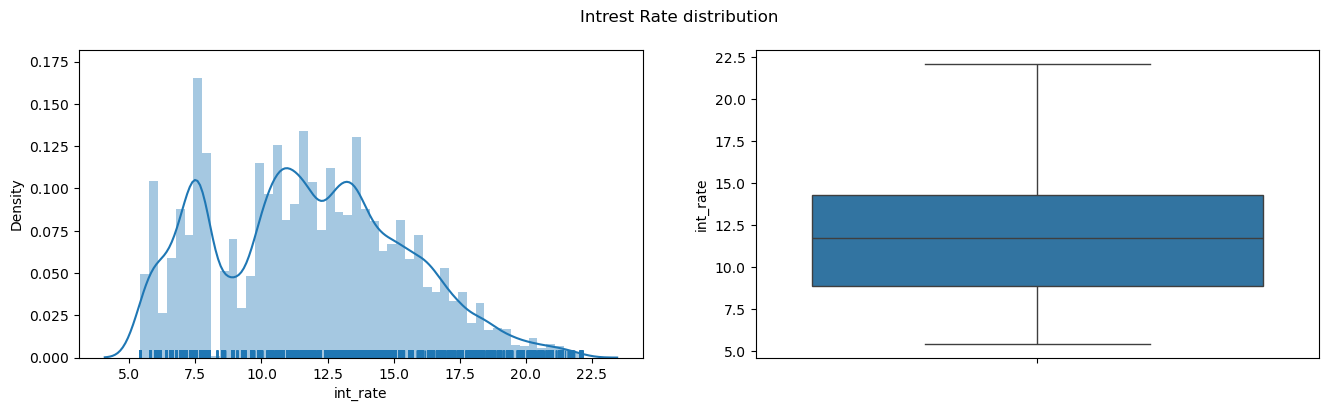

In [345]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(a=df.int_rate, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=df.int_rate)
plt.suptitle('Intrest Rate distribution')
plt.show()

Maximum intrest rate is 24 and most of the intrest rates lies between 9 to 14%

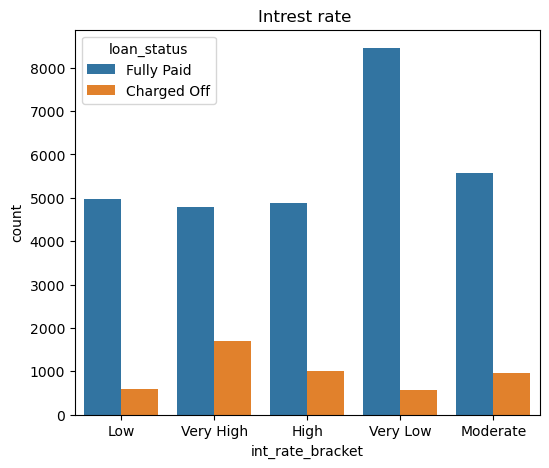

In [347]:
plt.figure(figsize=(6,5))
l = sns.countplot(x = 'int_rate_bracket', data = df, hue = "loan_status")
l.set_title("Intrest rate ")
plt.show()

When the loan interest rate is high there is high chance of loan getting defaulted.


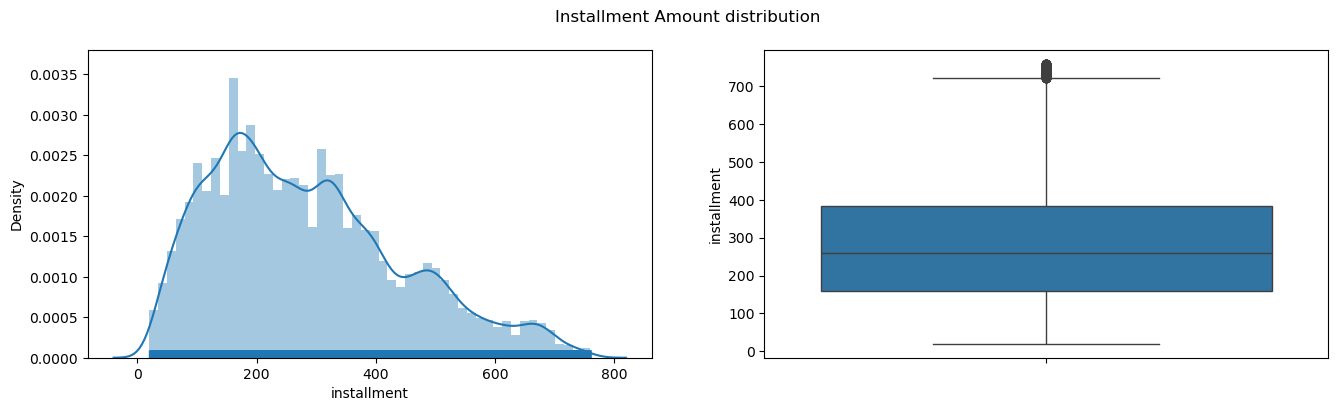

In [349]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(a=df.installment, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=df.installment)
plt.suptitle('Installment Amount distribution')
plt.show()

Most of the installments are in the range of 200 to 400 going at the max to 1305

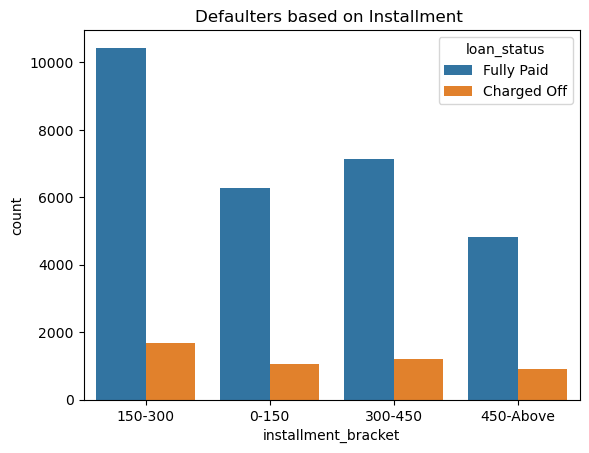

In [351]:
l = sns.countplot(x = 'installment_bracket', data = df, hue = "loan_status")
l.set_title("Defaulters based on Installment ")
plt.show()

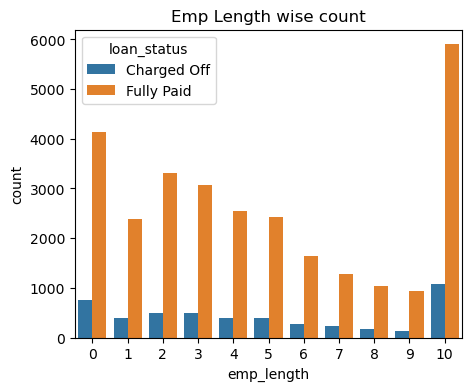

In [352]:
plt.figure(figsize=(5,4))
l = sns.countplot(x = 'emp_length', data = df, hue = "loan_status")
l.set_title("Emp Length wise count")
plt.show()

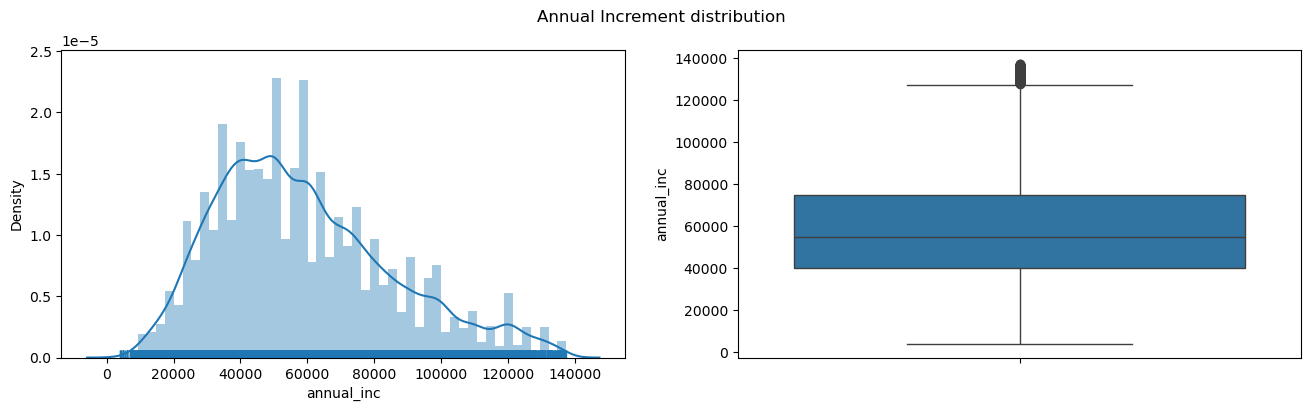

In [353]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(a=df.annual_inc, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=df.annual_inc)
plt.suptitle('Annual Increment distribution')
plt.show()

### Categorical Columns

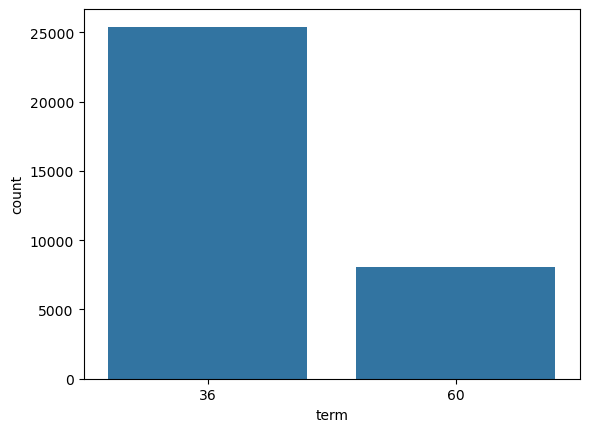

In [355]:
sns.countplot(data=df,x="term")
plt.show()

Majority of the loans are for term 36 months

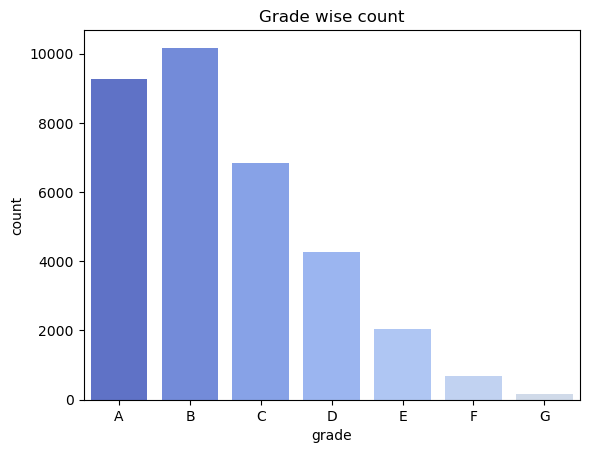

In [357]:
sns.countplot(data=df,x="grade",order="ABCDEFG",palette=palette)
plt.title("Grade wise count")
plt.show()

most of the Loan application fall under category B

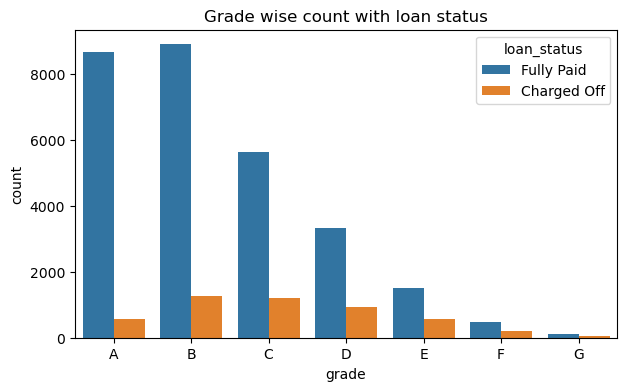

In [359]:
plt.figure(figsize=(7,4))
l = sns.countplot(x = 'grade', order =['A','B','C','D','E','F','G'], data = df, hue = 'loan_status') 
plt.title("Grade wise count with loan status")
plt.show()

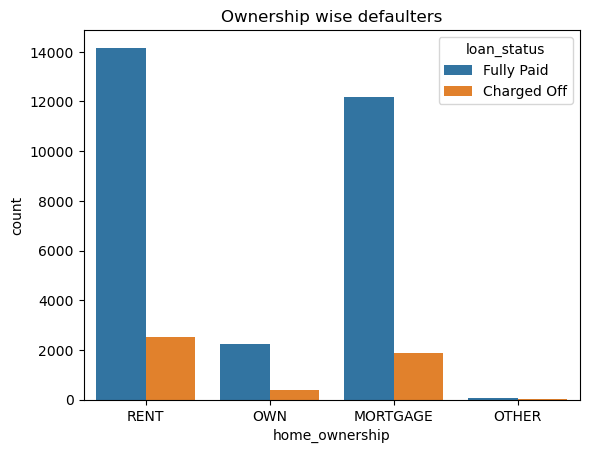

In [360]:
l = sns.countplot(x = 'home_ownership', data = df, hue = "loan_status")
l.set_title("Ownership wise defaulters")
plt.show()

Majority of the rented and mortaged applicated are defaulters

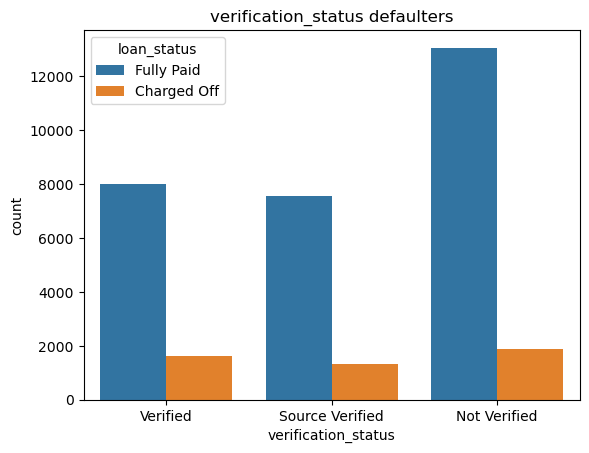

In [362]:
l = sns.countplot(x = 'verification_status', data = df, hue = "loan_status")
l.set_title("verification_status defaulters")
plt.show()

More Not verified applicats are defaultors process needs to be audited

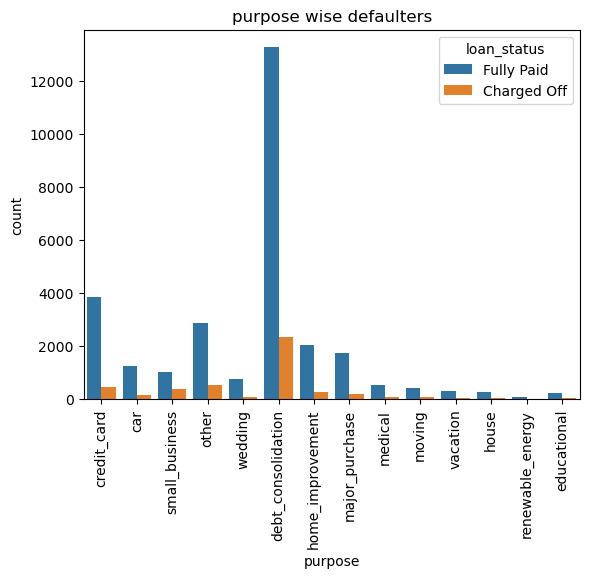

In [364]:
l = sns.countplot(x = 'purpose', data = df, hue = "loan_status")
l.set_title("purpose wise defaulters")
plt.xticks(rotation = 90)
plt.show()

Most of the applicants are debt_consolidated and also the defaultors are more from debt consolidated

In [366]:
# List of tuples for year and quarter mappings
quarter_and_year_bucket = [
    (2008, "Q1", "Q1-2008"),
    (2008, "Q2", "Q2-2008"),
    (2008, "Q3", "Q3-2008"),
    (2008, "Q4", "Q4-2008"),
    (2009, "Q1", "Q1-2009"),
    (2009, "Q2", "Q2-2009"),
    (2009, "Q3", "Q3-2009"),
    (2009, "Q4", "Q4-2009"),
    (2010, "Q1", "Q1-2010"),
    (2010, "Q2", "Q2-2010"),
    (2010, "Q3", "Q3-2010"),
    (2010, "Q4", "Q4-2010"),
    (2011, "Q1", "Q1-2011"),
    (2011, "Q2", "Q2-2011"),
    (2011, "Q3", "Q3-2011"),
    (2011, "Q4", "Q4-2011")
]

# Function to assign quarter-year bucket based on year and quarter
def quarter_and_year_bucket_with_loop(year, quarter):
    for bucket in quarter_and_year_bucket:
        if (bucket[0] == year) and (bucket[1] == quarter):
            return bucket[2]
    return 'Unknown'  # For any quarter-year pair outside the defined ranges

# Apply the function to create the new column 'quarter_year_bracket'
df['quarter_year_bracket'] = df.apply(lambda x: quarter_and_year_bucket_with_loop(x.issue_y, x.issue_q), axis=1)


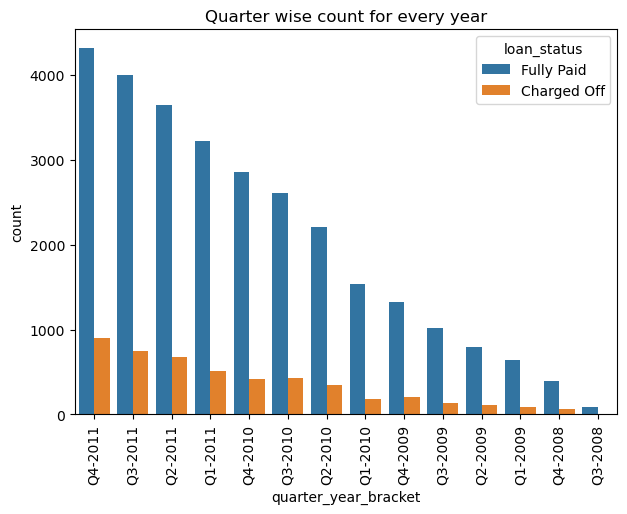

In [367]:
plt.figure(figsize=(7,5))
l = sns.countplot(x = 'quarter_year_bracket', data = df, hue = "loan_status")
l.set_title("Quarter wise count for every year")
plt.xticks(rotation = 90)
plt.show()

As far as quarter gets increase charged off also for the customers also rising.

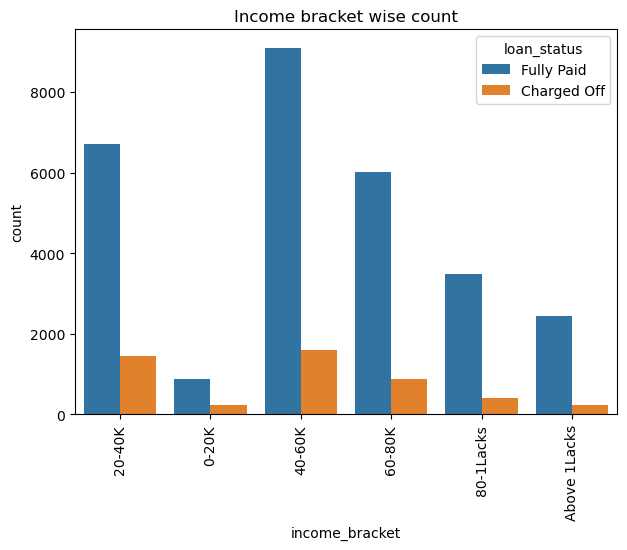

In [369]:
plt.figure(figsize=(7,5))
l = sns.countplot(x = 'income_bracket', data = df, hue = "loan_status")
l.set_title("Income bracket wise count")
plt.xticks(rotation = 90)
plt.show()

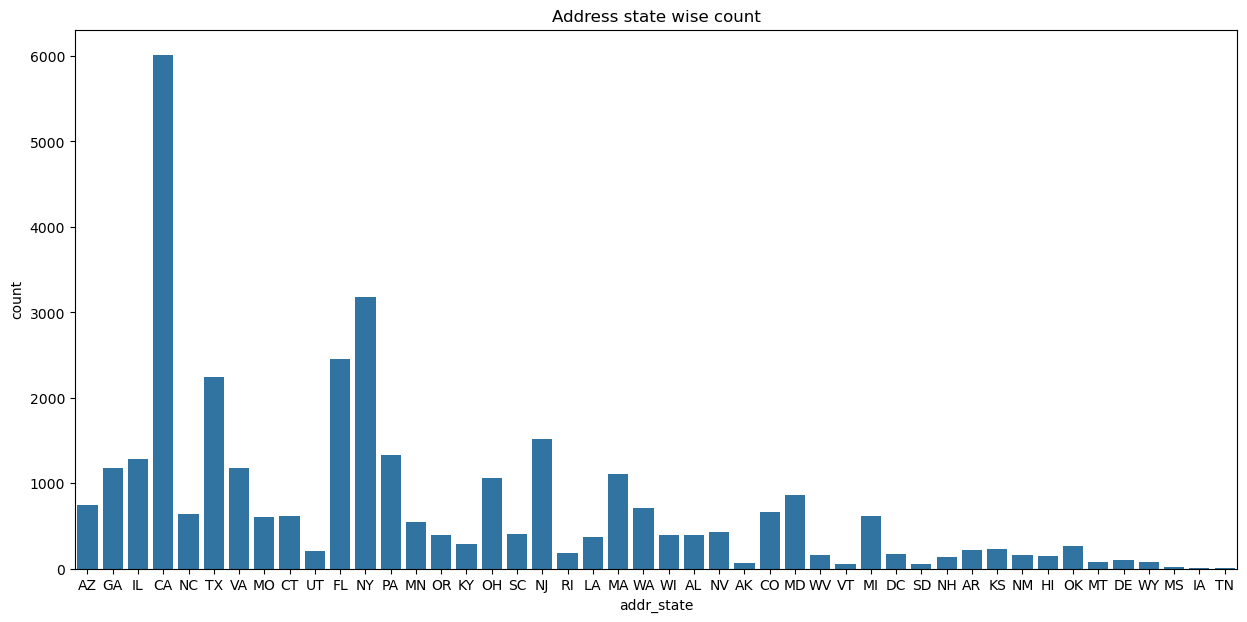

In [370]:
plt.figure(figsize=(15,7))
sns.countplot(data=df, x="addr_state")
plt.title("Address state wise count")
plt.show()

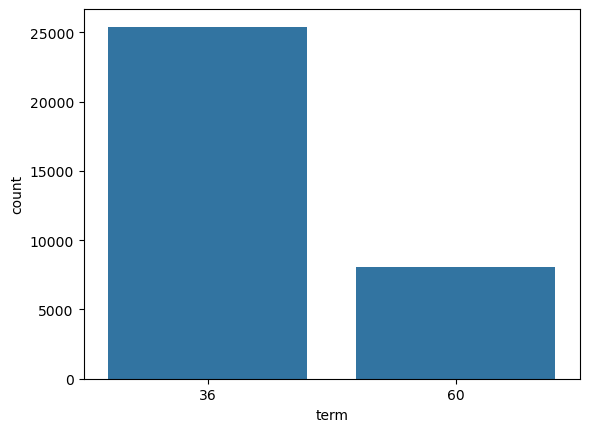

In [371]:
sns.countplot(data=df, x="term")
plt.show()

### Bivariate Analysis

In [373]:

income_bracket_count = df.groupby(['income_bracket', 'loan_status']).loan_status.count().unstack()
income_bracket_count['Total'] = income_bracket_count['Charged Off']  + income_bracket_count['Fully Paid'] 
income_bracket_count['Chargedoff_Proportion'] = income_bracket_count['Charged Off'] / income_bracket_count['Total']


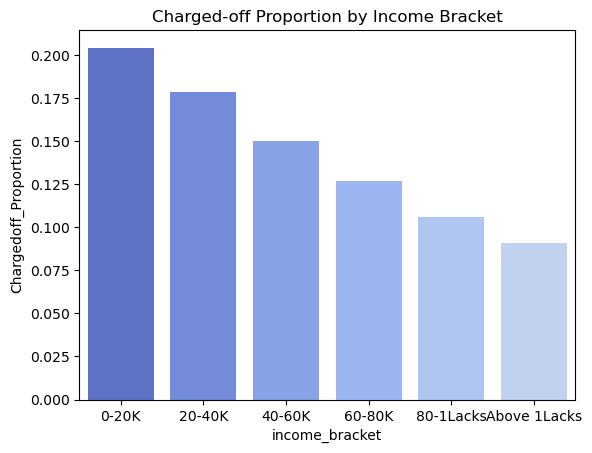

In [374]:

sns.barplot(data=income_bracket_count, 
            x="income_bracket", 
            y="Chargedoff_Proportion", 
            palette=palette)

plt.title("Charged-off Proportion by Income Bracket")
plt.show()


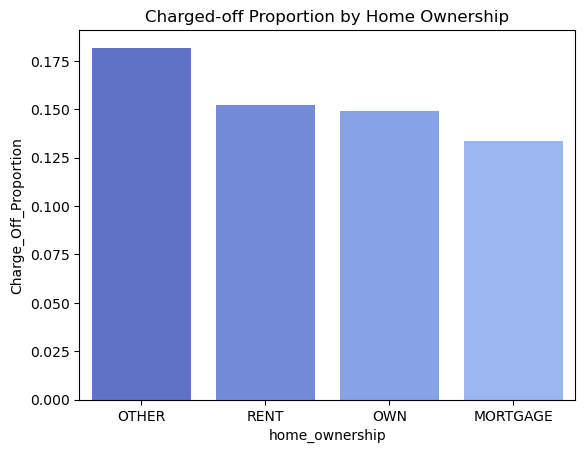

In [375]:
home_ownership_count = df.groupby(["home_ownership","loan_status"])["loan_status"].count().unstack()
home_ownership_count["Total"] = home_ownership_count["Charged Off"] + home_ownership_count["Fully Paid"]
home_ownership_count["Charge_Off_Proportion"] = home_ownership_count["Charged Off"] / home_ownership_count["Total"]


home_ownership_count_sorted = home_ownership_count.sort_values("Charge_Off_Proportion", ascending=False)

sns.barplot(data=home_ownership_count_sorted, x="home_ownership", y="Charge_Off_Proportion",palette=palette)
plt.title("Charged-off Proportion by Home Ownership")
plt.show()

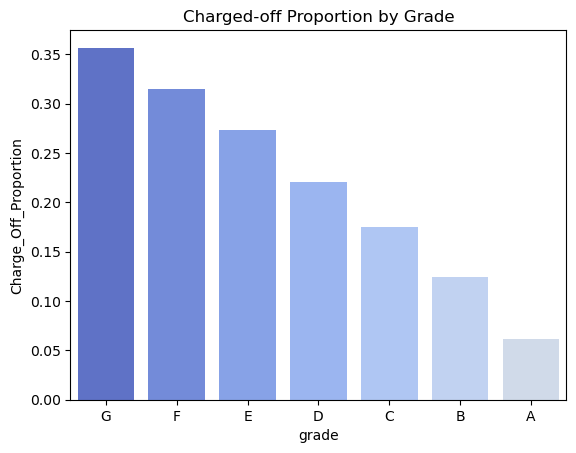

In [376]:
grade_count = df.groupby(["grade","loan_status"])["loan_status"].count().unstack()
grade_count["Total"] = grade_count["Charged Off"] + grade_count["Fully Paid"]
grade_count["Charge_Off_Proportion"] = grade_count["Charged Off"] / grade_count["Total"]

grade_count_sorted = grade_count.sort_values("Charge_Off_Proportion", ascending=False)


sns.barplot(data=grade_count_sorted, x="grade", y="Charge_Off_Proportion",palette=palette)
plt.title("Charged-off Proportion by Grade")
plt.show()

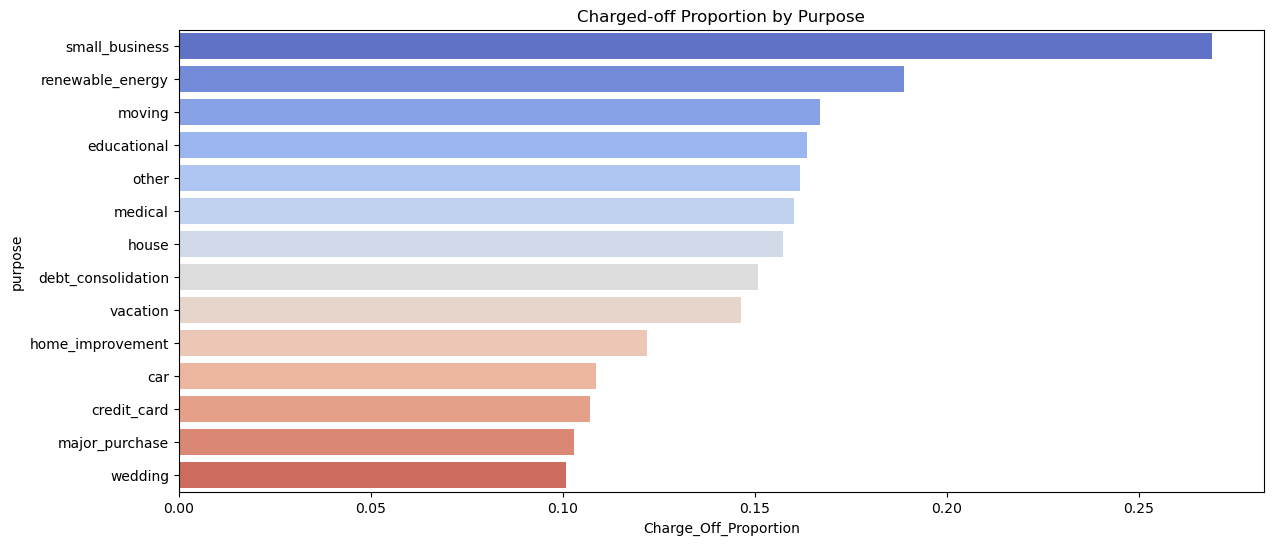

In [377]:
plt.figure(figsize=(14,6))
purpose_count = df.groupby(["purpose","loan_status"])["loan_status"].count().unstack()
purpose_count["Total"] = purpose_count["Charged Off"] + purpose_count["Fully Paid"]
purpose_count["Charge_Off_Proportion"] = purpose_count["Charged Off"] / purpose_count["Total"]

purpose_count_sorted = purpose_count.sort_values("Charge_Off_Proportion", ascending=False)

sns.barplot(data=purpose_count_sorted, y="purpose", x="Charge_Off_Proportion",palette=palette,orient="h")
plt.title("Charged-off Proportion by Purpose")
plt.show()

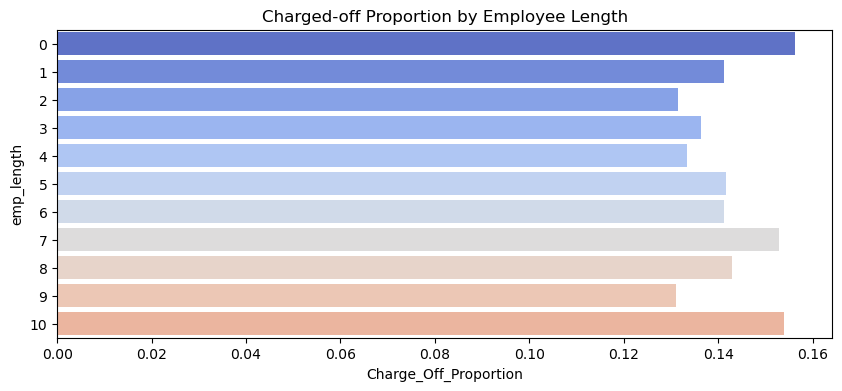

In [378]:
plt.figure(figsize=(10,4))
emp_length_count = df.groupby(["emp_length","loan_status"])["loan_status"].count().unstack()
emp_length_count["Total"] = emp_length_count["Charged Off"] + emp_length_count["Fully Paid"]
emp_length_count["Charge_Off_Proportion"] = emp_length_count["Charged Off"] / emp_length_count["Total"]

emp_length_count_sorted = emp_length_count.sort_values("Charge_Off_Proportion", ascending=False)

sns.barplot(data=emp_length_count_sorted, y="emp_length", x="Charge_Off_Proportion",palette=palette,orient="h")
plt.title("Charged-off Proportion by Employee Length")
plt.show()

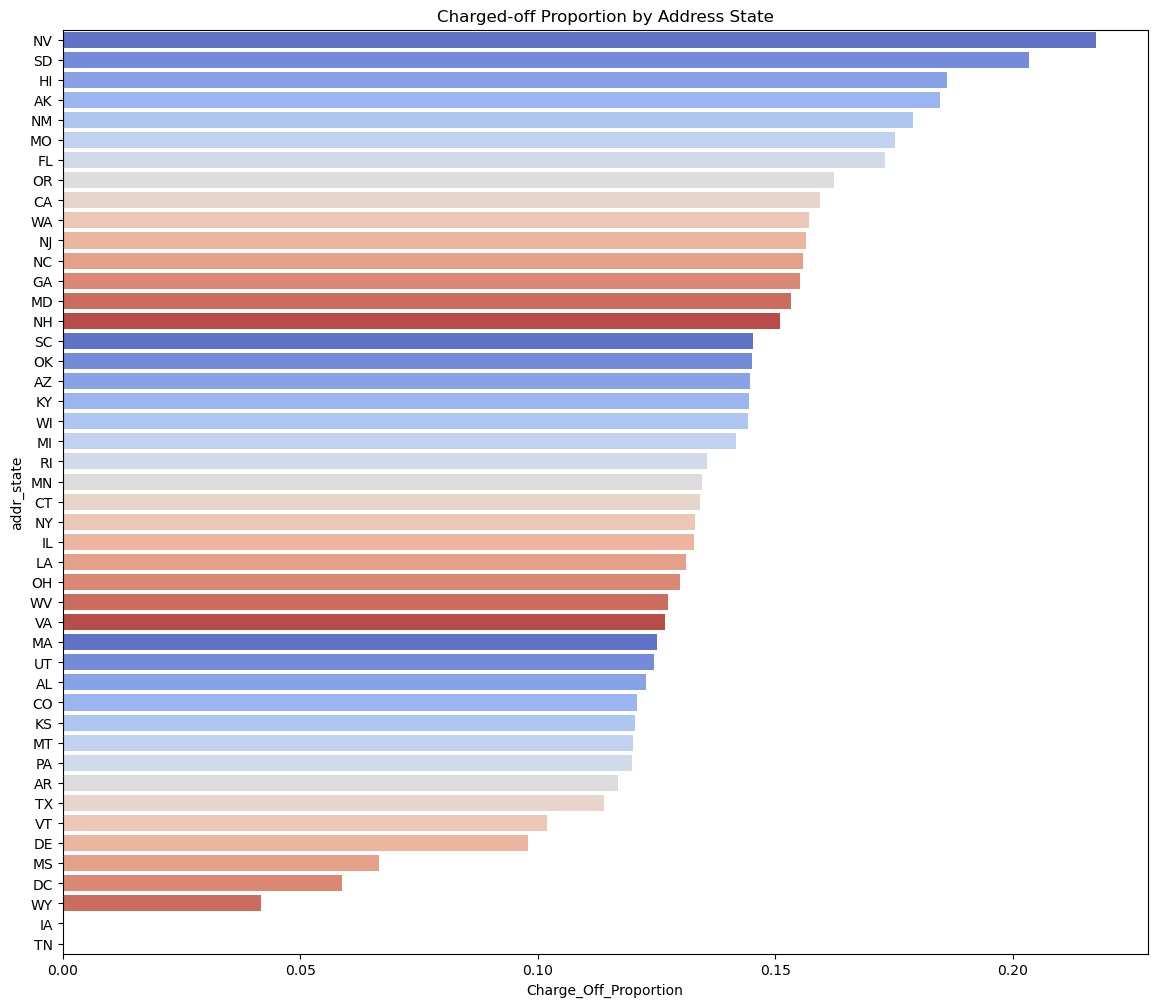

In [379]:
plt.figure(figsize=(14,12))
addr_state_count = df.groupby(["addr_state","loan_status"])["loan_status"].count().unstack()
addr_state_count["Total"] = addr_state_count["Charged Off"] + addr_state_count["Fully Paid"]
addr_state_count["Charge_Off_Proportion"] = addr_state_count["Charged Off"] / addr_state_count["Total"]

addr_state_count_sorted = addr_state_count.sort_values("Charge_Off_Proportion", ascending=False)

sns.barplot(data=addr_state_count_sorted, y="addr_state", x="Charge_Off_Proportion",palette=palette,orient="h")
plt.title("Charged-off Proportion by Address State")
plt.show()

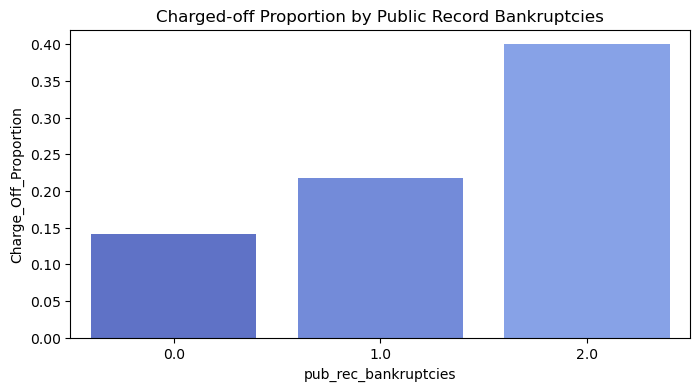

In [380]:

plt.figure(figsize=(8,4))
pub_rec_bankruptcies_count = df.groupby(["pub_rec_bankruptcies","loan_status"])["loan_status"].count().unstack()
pub_rec_bankruptcies_count["Total"] = pub_rec_bankruptcies_count["Charged Off"] + pub_rec_bankruptcies_count["Fully Paid"]
pub_rec_bankruptcies_count["Charge_Off_Proportion"] = pub_rec_bankruptcies_count["Charged Off"] / pub_rec_bankruptcies_count["Total"]

pub_rec_bankruptcies_count_sorted = pub_rec_bankruptcies_count.sort_values("Charge_Off_Proportion", ascending=False)


sns.barplot(data=pub_rec_bankruptcies_count_sorted, x="pub_rec_bankruptcies", y="Charge_Off_Proportion",palette=palette,orient="v")
plt.title("Charged-off Proportion by Public Record Bankruptcies")
plt.show()

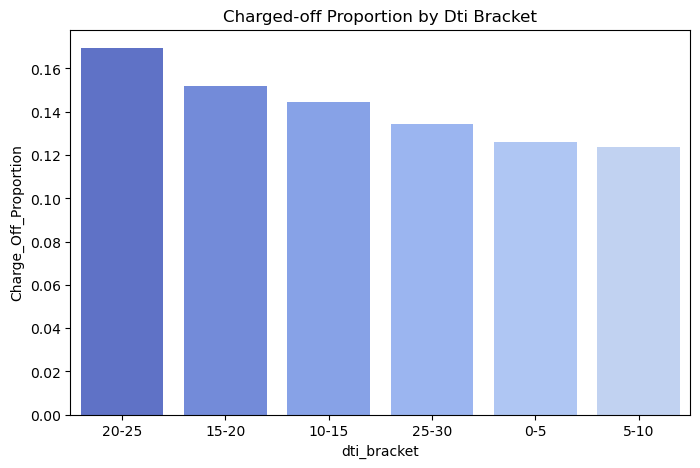

In [381]:
df["dti_bracket"] = df["dti"].apply(debt_to_inc_ration_to_bracket)
plt.figure(figsize=(8,5))
dti_bracket_count = df.groupby(["dti_bracket","loan_status"])["loan_status"].count().unstack()
dti_bracket_count["Total"] = dti_bracket_count["Charged Off"] + dti_bracket_count["Fully Paid"]
dti_bracket_count["Charge_Off_Proportion"] = dti_bracket_count["Charged Off"] / dti_bracket_count["Total"]

dti_bracket_count_sorted = dti_bracket_count.sort_values("Charge_Off_Proportion", ascending=False)

sns.barplot(data=dti_bracket_count_sorted, x="dti_bracket", y="Charge_Off_Proportion",palette=palette)
plt.title("Charged-off Proportion by Dti Bracket")
plt.show()

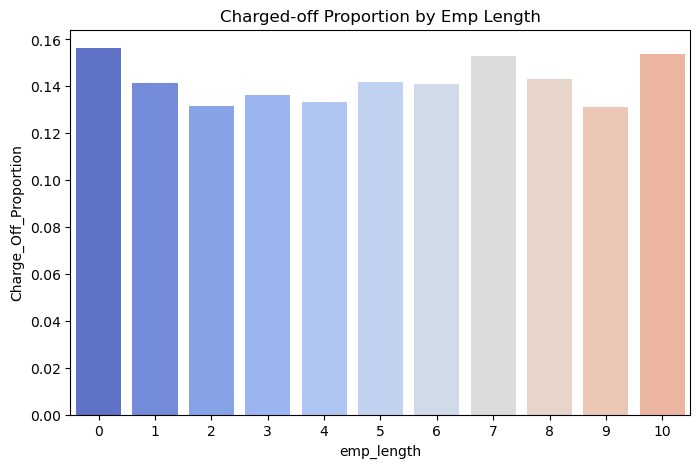

In [382]:
plt.figure(figsize=(8,5))
emp_length_count = df.groupby(["emp_length","loan_status"])["loan_status"].count().unstack()
emp_length_count["Total"] = emp_length_count["Charged Off"] + emp_length_count["Fully Paid"]
emp_length_count["Charge_Off_Proportion"] = emp_length_count["Charged Off"] / emp_length_count["Total"]

emp_length_count_sorted = emp_length_count.sort_values("Charge_Off_Proportion", ascending=False)

sns.barplot(data=emp_length_count_sorted, x="emp_length", y="Charge_Off_Proportion",palette=palette)
plt.title("Charged-off Proportion by Emp Length")
plt.show()

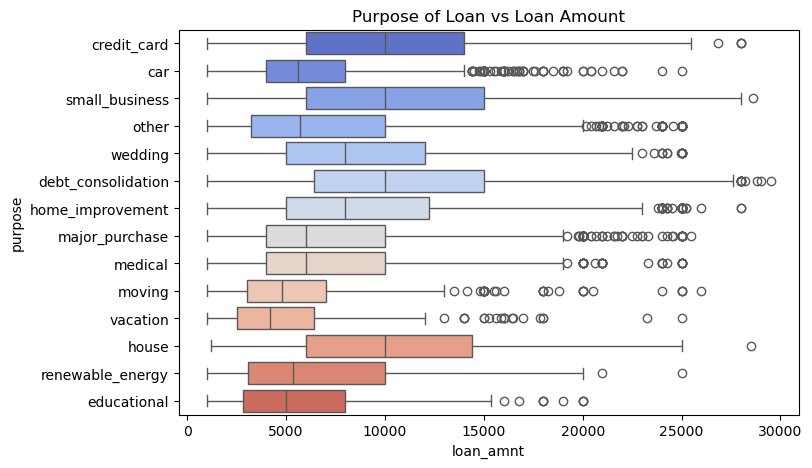

In [383]:
plt.figure(figsize=(8,5))
sns.boxplot(y='purpose', x='loan_amnt', data =df,palette=palette)
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

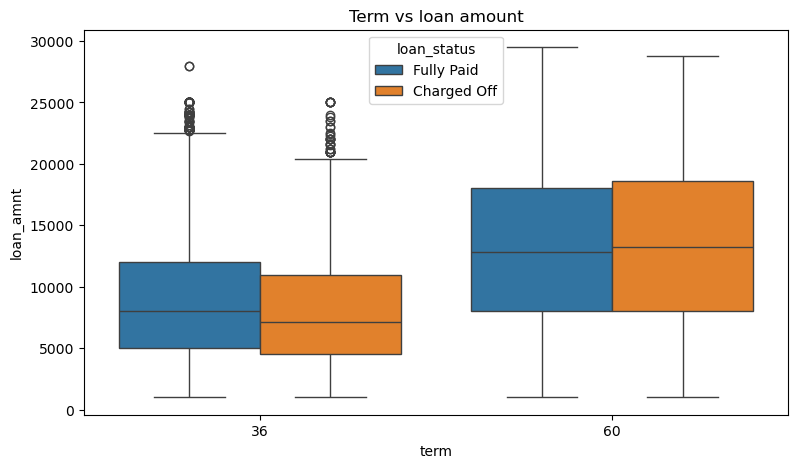

In [384]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=df)
plt.title('Term vs loan amount')
plt.show()

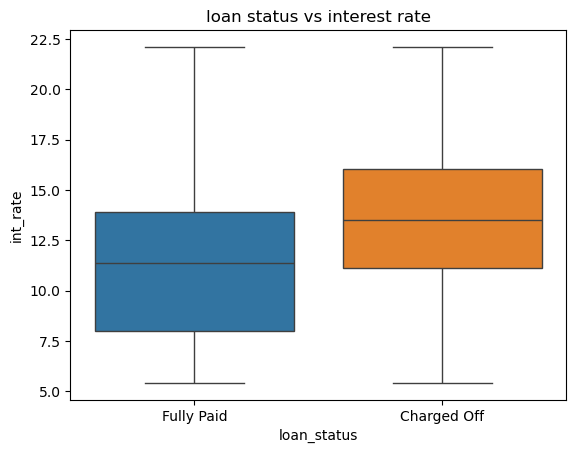

In [385]:
sns.boxplot(x='loan_status', y='int_rate', data=df, hue="loan_status")
plt.title('loan status vs interest rate')
plt.show()

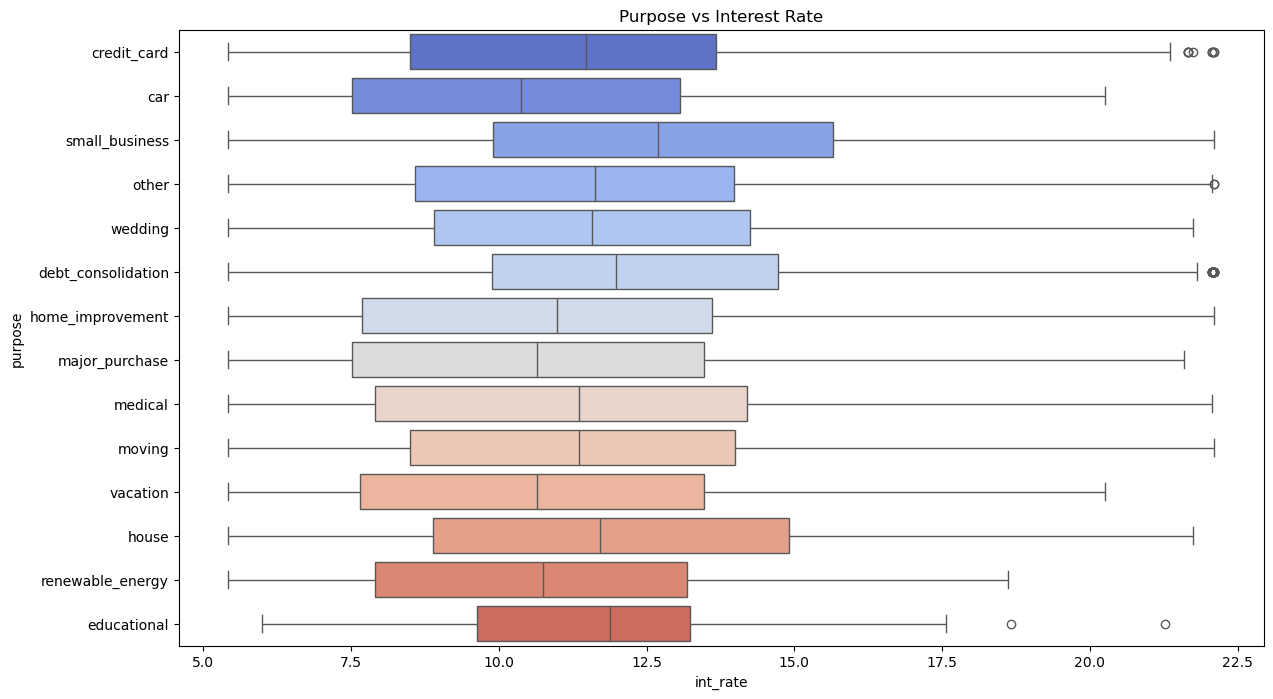

In [386]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df,y="purpose", x="int_rate",orient="h",palette=palette)
plt.title("Purpose vs Interest Rate")
plt.show()

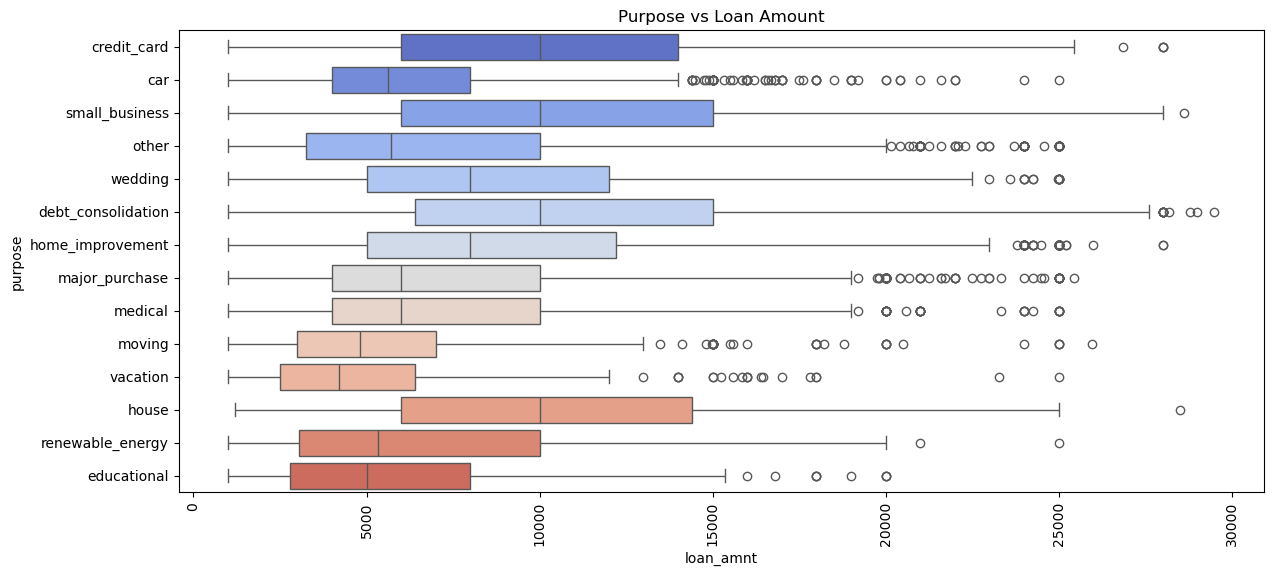

In [387]:
plt.figure(figsize=(14,6))
sns.boxplot(y="purpose", x="loan_amnt",orient="h", data=df,palette=palette)
plt.title("Purpose vs Loan Amount")
plt.xticks(rotation=90)
plt.show()

### Additional Box plot categorical vs Numerical cols 

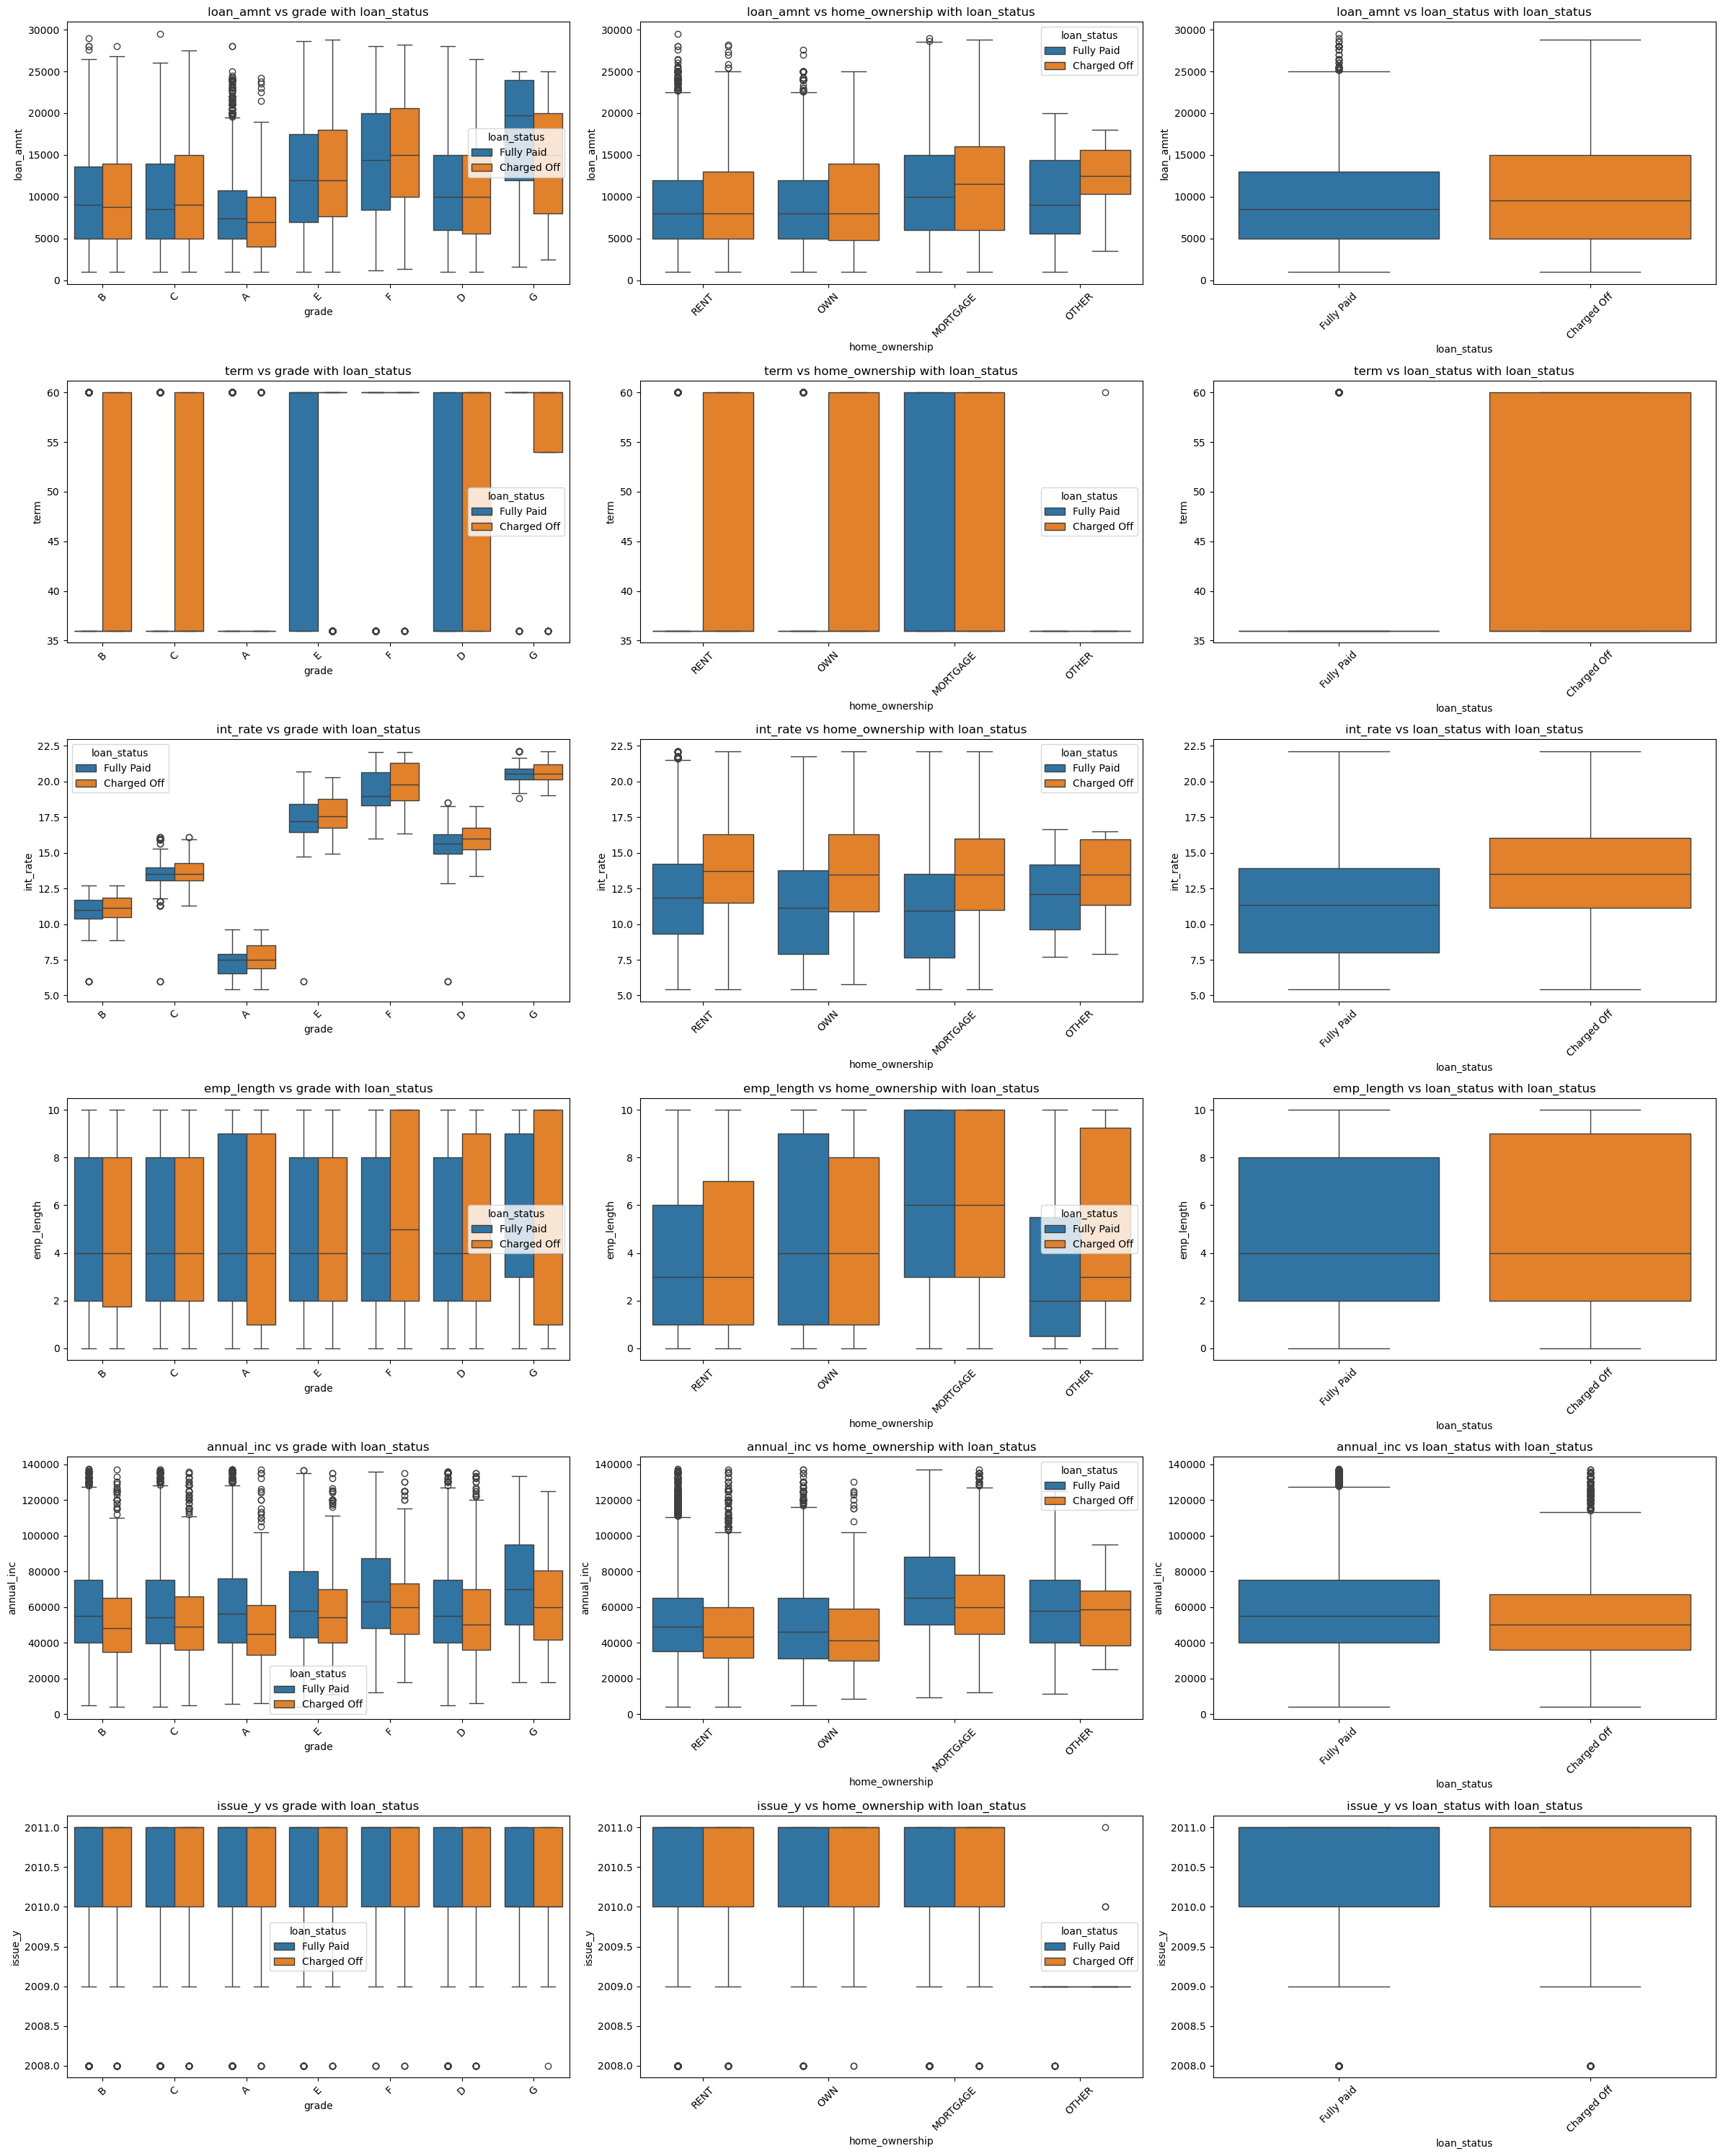

In [389]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ["loan_amnt", "term", "int_rate", "emp_length", "annual_inc", "issue_y"]
cat_cols = ["grade", "home_ownership", "loan_status"]
hue_col = 'loan_status'  # You can change this to any column you want for hue

# Define number of rows and columns for subplots grid
rows = len(num_cols)
cols = len(cat_cols)

# Create subplots with the defined grid size
fig, axes = plt.subplots(rows, cols, figsize=(cols * 8, rows * 5))

# Loop over the numerical and categorical columns
for i, num in enumerate(num_cols):
    for j, cat in enumerate(cat_cols):
        sns.boxplot(x=df[cat], y=df[num], hue=df[hue_col], ax=axes[i, j])  # Create boxplot with hue
        axes[i, j].set_title(f'{num} vs {cat} with {hue_col}')
        axes[i, j].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


In [390]:
### Additional Dist plot for Numerical Columns

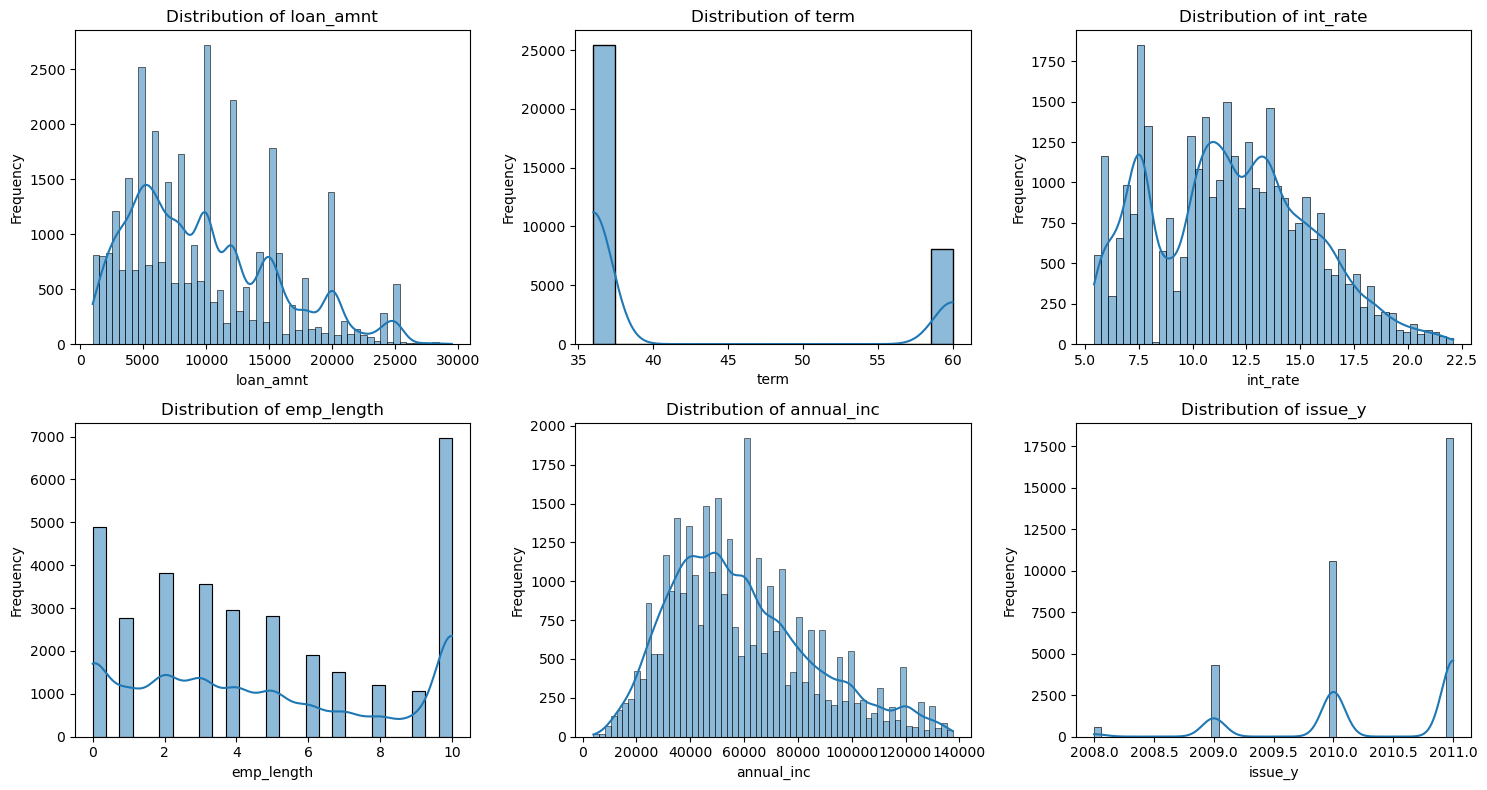

In [391]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns
num_cols = ["loan_amnt", "term", "int_rate", "emp_length", "annual_inc", "issue_y"]

# Define the number of plots (subplots grid)
num_plots = len(num_cols)
cols = 3  # Number of columns in the grid
rows = (num_plots + cols - 1) // cols  # Calculate the number of rows needed

# Create subplots with the defined grid size
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), sharex=False, sharey=False)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numerical column
for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])  # Create dist plot with KDE
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots (if num_cols is not a perfect multiple of cols)
for j in range(len(num_cols), len(axes)):
    axes[j].set_visible(False)

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


In [392]:
df["loan_status_num"]=df["loan_status"].apply(lambda x: 0 if x=="Charged Off" else 1)

### Corelation Matrix

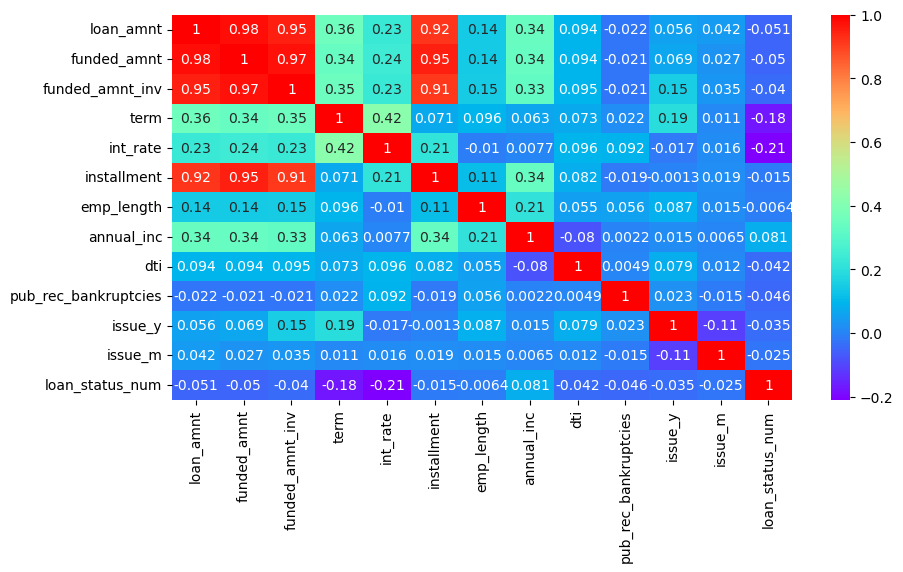

In [394]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# List of numerical columns
num_col = [] 

for col in df.columns:
    if((df[col].dtype == "int32") or (df[col].dtype == "int64") or (df[col].dtype == "float32") or (df[col].dtype == "float64") ):
        num_col.append(col)

fig=plt.figure(figsize=(10,5))
sns.heatmap(df[num_col].corr(),annot=True,cmap="rainbow")
plt.show()
